In [1]:
import json
import os
import re
from math import log2, pi
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import qiskit.result
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from scipy.spatial import distance
from tqdm import tqdm

## Circuit for Hamming distance calculation

In [2]:
def hamdist_circuit(n_data_qubits, n_auxilia_qubits, lite=False):
    """Quantum circuit for  Hamming distance calculation"""
    qrx = QuantumRegister(n_data_qubits, "x")
    qry = QuantumRegister(n_data_qubits, "y")
    qra = QuantumRegister(n_auxilia_qubits, "a")
    circ = QuantumCircuit(qrx, qry, qra, name="Hamming distance")

    # Ecncoding
    circ.cx(qry, qrx)

    # Extraction
    circ.barrier()
    if qra.size == 1:
        circ.h(qra)
        circ.crz(pi / n_data_qubits, qrx, qra)
        circ.h(qra)

    elif qra.size > 1 and qrx.size == 4:
        circ.h(qra[0])
        circ.crz(pi / n_data_qubits, qrx[: n_data_qubits // 2], qra[0])
        for i in range(qra.size - 1):
            circ.swap(qra[i + 1], qra[i])
        circ.crz(pi / n_data_qubits, qrx[n_data_qubits // 2 :], qra[-1])
        circ.h(qra[-1])

    elif qra.size > 1 and qrx.size == 5:
        circ.h(qra[0])
        circ.crz(pi / qrx.size, qrx[: qrx.size // 2], qra[0])
        for i in range(qra.size // 2):
            circ.swap(qra[i + 1], qra[i])
        circ.crz(pi / qrx.size, qrx[qrx.size // 2], qra[qra.size // 2])
        for i in range(qra.size // 2, qra.size - 1):
            circ.swap(qra[i + 1], qra[i])
        circ.crz(pi / qrx.size, qrx[qrx.size // 2 + 1 :], qra[-1])
        circ.h(qra[-1])

    elif qra.size > 1 and qrx.size == 8:
        circ.h(qra[0])
        circ.crz(pi / qrx.size, qrx[:2], qra[0])

        for j in range(4):
            i_ancilla = 2 * j
            for i in range(2):
                circ.swap(qra[i_ancilla + i + 1], qra[i_ancilla + i])
            circ.crz(pi / qrx.size, qrx[j + 2], qra[i_ancilla + 2])

        for i in range(2):
            circ.swap(qra[qra.size - 2 + i], qra[qra.size - 3 + i])
        circ.crz(pi / qrx.size, qrx[qrx.size - 3 :], qra[-1])
        circ.h(qra[-1])
    else:
        raise NotImplementedError(f"to many ancilas: {n_auxilia_qubits}")

    # Decoding
    circ.barrier()
    if not lite:
        circ.cx(qry, qrx)

    return circ

### Example with 3 data qubits and single auxilia qubits

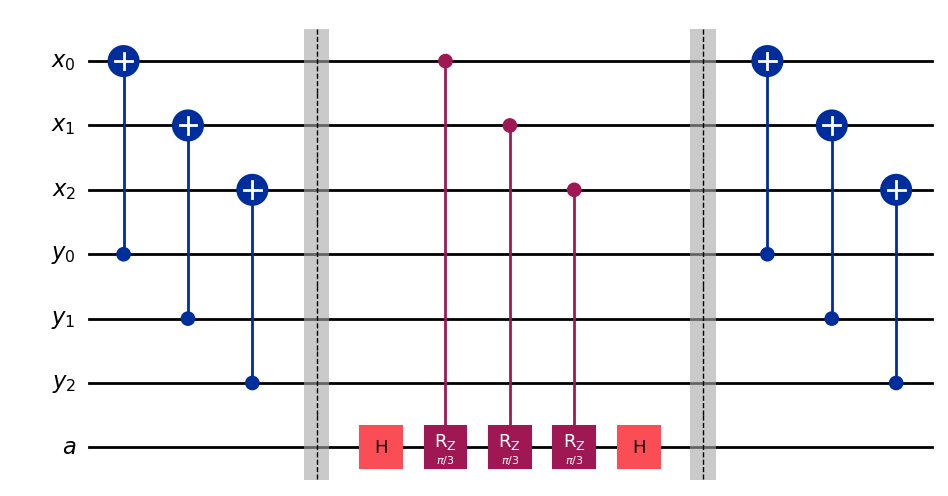

In [3]:
hamdist_circuit(3, 1, False).draw(output="mpl")

**Decomposed**

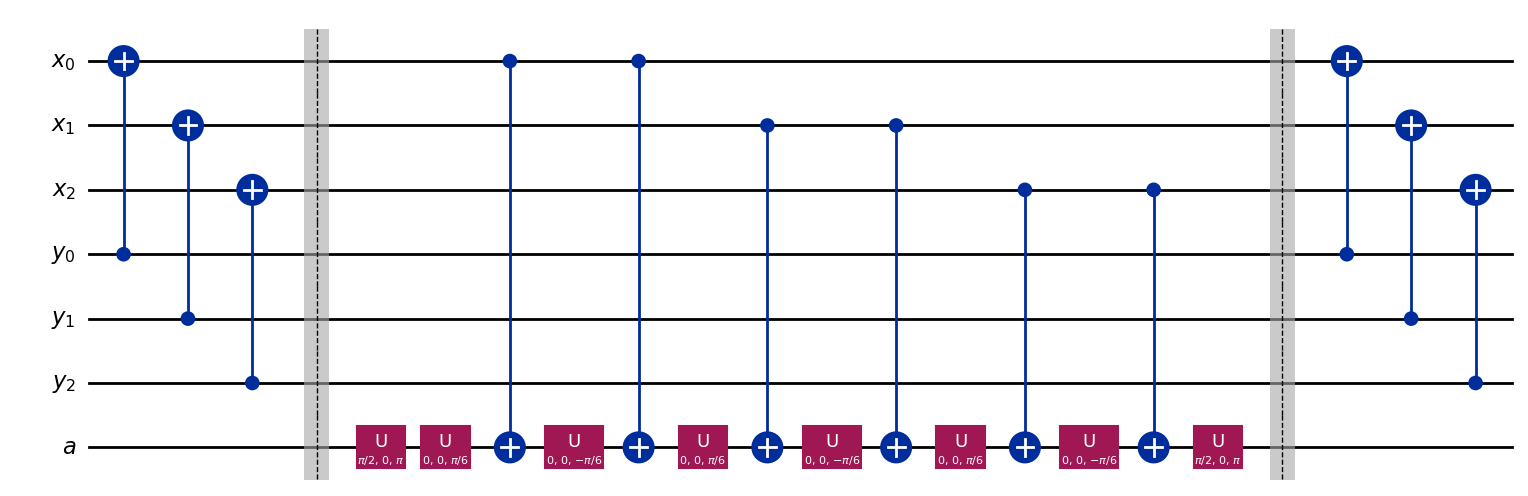

In [4]:
hamdist_circuit(3, 1, False).decompose(reps=6).draw(output="mpl")

#### Figure of circuit for paper

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


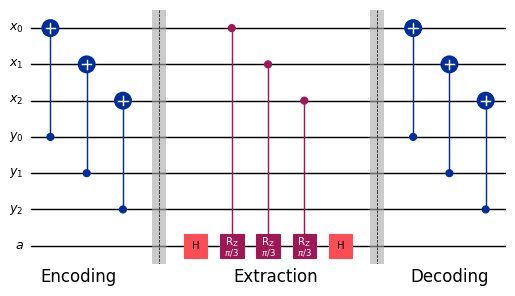

In [5]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1, 1)

style = {
    "fontsize": 14,
    "subfontsize": 12,
    "backgroundcolor": "white",
    "margin": [1.35, 0, 0, 0],
}

hamdist_circuit(3, 1, False).draw(ax=ax, style=style, output="mpl")

ax.text(-0.5, -7, "Encoding", fontsize=12)
ax.text(4.8, -7, "Extraction", fontsize=12)
ax.text(9.7, -7, "Decoding", fontsize=12)

fig.set_facecolor("white")
fig.savefig("hd-circuit-n3a1.eps", bbox_inches="tight")
fig.savefig("hd-circuit-n3a1.pdf", bbox_inches="tight")

### Example with 4 data qubits and 3 auxilia qubits

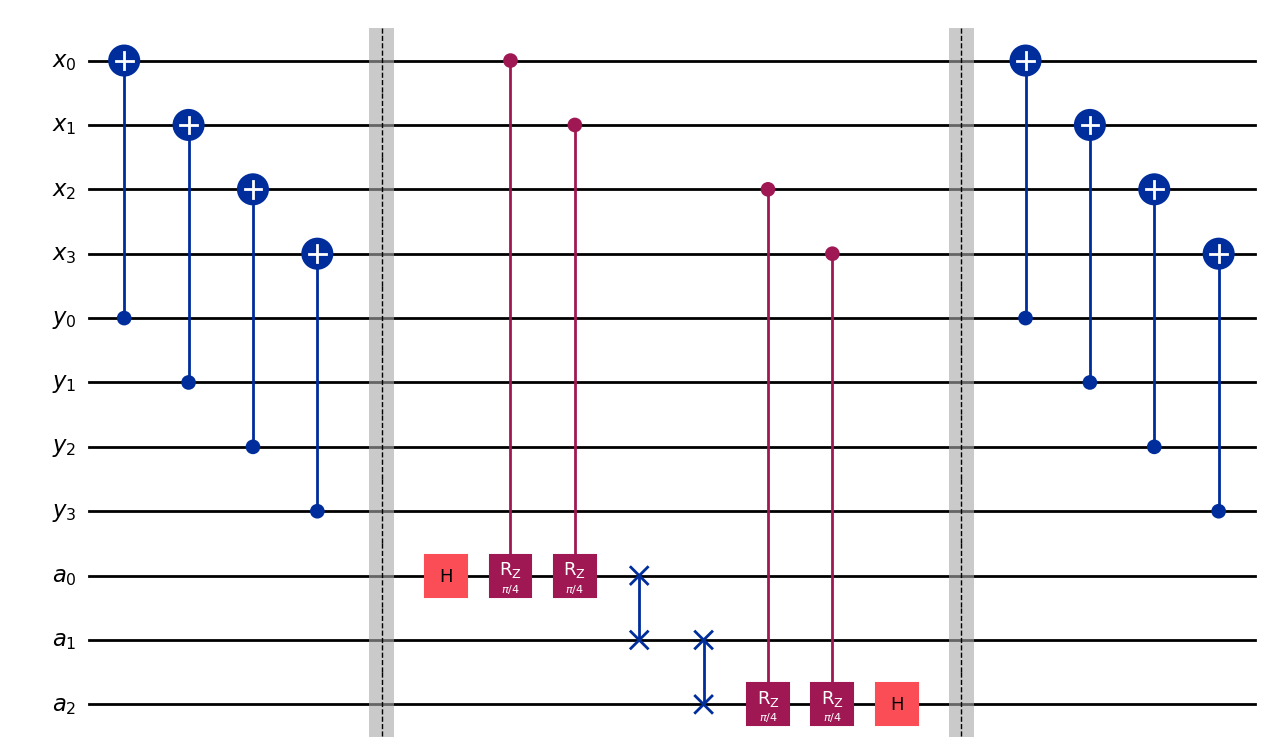

In [6]:
hamdist_circuit(4, 3, False).draw(output="mpl")

#### Figure

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


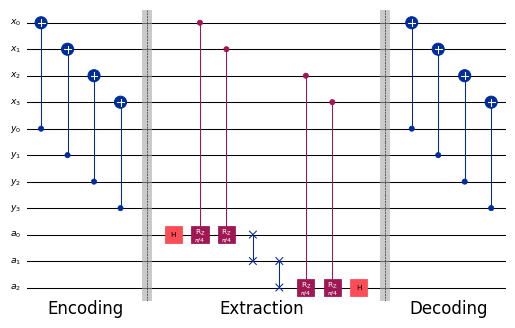

In [7]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1, 1)

style = {
    "fontsize": 14,
    "subfontsize": 12,
    "backgroundcolor": "white",
    "margin": [1.4, 0, 0, 0],
}

hamdist_circuit(4, 3, False).draw(ax=ax, style=style, output="mpl")

ax.text(0, -11, "Encoding", fontsize=12)
ax.text(6.5, -11, "Extraction", fontsize=12)
ax.text(13.7, -11, "Decoding", fontsize=12)

fig.set_facecolor("white")
fig.savefig("hd-circuit-n4a3.eps", bbox_inches="tight")
fig.savefig("hd-circuit-n4a3.pdf", bbox_inches="tight")
fig.savefig("hd-circuit-n4a3.png", bbox_inches="tight")

### Figure with single ancilla

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


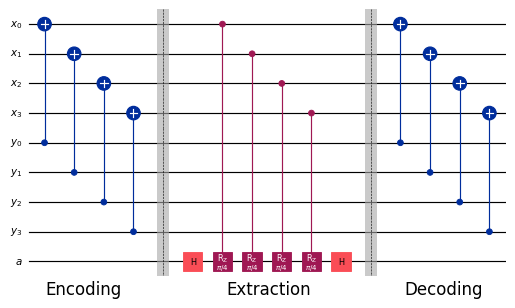

In [8]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1, 1)

style = {
    "fontsize": 14,
    "subfontsize": 12,
    "backgroundcolor": "white",
    "margin": [1.4, 0, 0, 0],
}

hamdist_circuit(4, 1, False).draw(ax=ax, style=style, output="mpl")

ax.text(-0.2, -9.1, "Encoding", fontsize=12)
ax.text(5.9, -9.1, "Extraction", fontsize=12)
ax.text(11.9, -9.1, "Decoding", fontsize=12)

fig.set_facecolor("white")
fig.savefig("hd-circuit-n4a3.eps", bbox_inches="tight")
fig.savefig("hd-circuit-n4a3.pdf", bbox_inches="tight")
fig.savefig("hd-circuit-n4a3.png", bbox_inches="tight")

### Example with 5 data qubits and 5 auxilia qubits

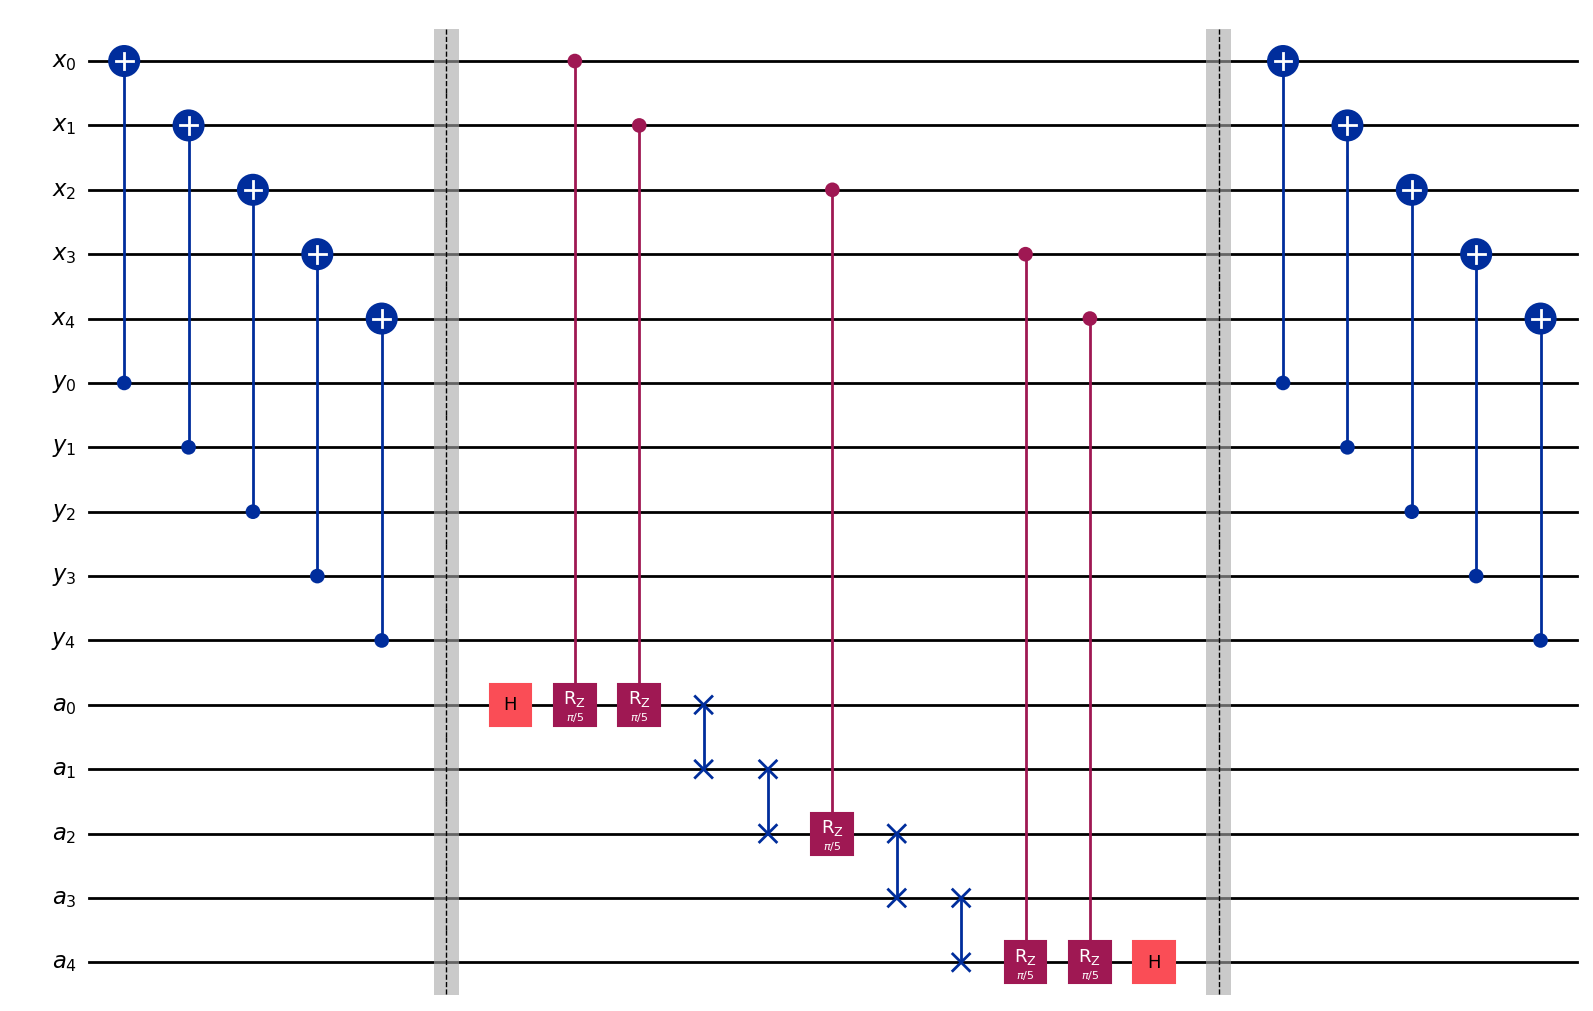

In [9]:
hamdist_circuit(5, 5, False).draw(output="mpl")

#### Figure of circuit for paper

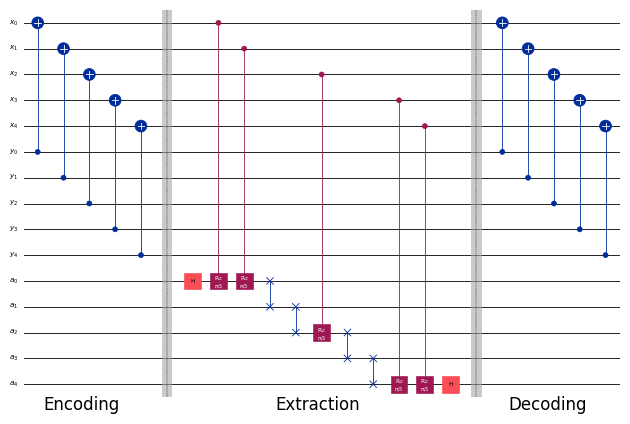

In [10]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1, 1)

style = {
    "fontsize": 14,
    "subfontsize": 12,
    "backgroundcolor": "white",
    "margin": [1.3, 0, 0, 0],
}

hamdist_circuit(5, 5, False).draw(ax=ax, style=style, output="mpl")

ax.text(0, -15, "Encoding", fontsize=12)
ax.text(9, -15, "Extraction", fontsize=12)
ax.text(18, -15, "Decoding", fontsize=12)

fig.set_facecolor("white")
fig.tight_layout()
fig.savefig(f"hd-circuit-n5a5.png", bbox_inches="tight", dpi=200)

### Example with 8 data qubits and 11 auxilia qubits

In [11]:
hamdist_circuit(8, 11, False).draw(fold=-1)

┌───┐                                    ░                                                                                                                                             ░ ┌───┐                                   
 x_0: ┤ X ├────────────────────────────────────░───────────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░─┤ X ├───────────────────────────────────
      └─┬─┘┌───┐                               ░           │                                                                                                                                 ░ └─┬─┘┌───┐                              
 x_1: ──┼──┤ X ├───────────────────────────────░───────────┼──────────■──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░───┼──┤ X ├──────────────────────────────
        │  └─┬─┘┌───┐                          ░           │          │                                                                                                                      ░   │  └─┬─┘┌───┐                         
 x_2: ──┼────┼──┤ X ├──────────────────────────░───────────┼──────────┼────────────────■─────────────────────────────────────────────────────────────────────────────────────────────────────░───┼────┼──┤ X ├─────────────────────────
        │    │  └─┬─┘┌───┐                     ░           │          │                │                                                                                                     ░   │    │  └─┬─┘┌───┐                    
 x_3: ──┼────┼────┼──┤ X ├─────────────────────░───────────┼──────────┼────────────────┼────────────────■────────────────────────────────────────────────────────────────────────────────────░───┼────┼────┼──┤ X ├────────────────────
        │    │    │  └─┬─┘┌───┐                ░           │          │                │                │                                                                                    ░   │    │    │  └─┬─┘┌───┐               
 x_4: ──┼────┼────┼────┼──┤ X ├────────────────░───────────┼──────────┼────────────────┼────────────────┼────────────────■───────────────────────────────────────────────────────────────────░───┼────┼────┼────┼──┤ X ├───────────────
        │    │    │    │  └─┬─┘┌───┐           ░           │          │                │                │                │                                                                   ░   │    │    │    │  └─┬─┘┌───┐          
 x_5: ──┼────┼────┼────┼────┼──┤ X ├───────────░───────────┼──────────┼────────────────┼────────────────┼────────────────┼────────────────■────────────────■─────────────────────────────────░───┼────┼────┼────┼────┼──┤ X ├──────────
        │    │    │    │    │  └─┬─┘┌───┐      ░           │          │                │                │                │                │                │                                 ░   │    │    │    │    │  └─┬─┘┌───┐     
 x_6: ──┼────┼────┼────┼────┼────┼──┤ X ├──────░───────────┼──────────┼────────────────┼────────────────┼────────────────┼────────────────┼────────────────┼──────────■──────────────────────░───┼────┼────┼────┼────┼────┼──┤ X ├─────
        │    │    │    │    │    │  └─┬─┘┌───┐ ░           │          │                │                │                │                │                │          │                      ░   │    │    │    │    │    │  └─┬─┘┌───┐
 x_7: ──┼────┼────┼────┼────┼────┼────┼──┤ X ├─░───────────┼──────────┼────────────────┼────────────────┼────────────────┼────────────────┼────────────────┼──────────┼──────────■───────────░───┼────┼────┼────┼────┼────┼────┼──┤ X ├
        │    │    │    │    │    │    │  └─┬─┘ ░           │          │                │                │                │                │                │          │          │           ░   │    │    │    │    │    │    │  └─┬─┘
 y_0: ──■────┼────┼────┼────┼────┼────┼────┼───░───────────┼──

## Curcuit for Hamming distance tomography

In [12]:
def _compile_stack(states):
    """
    Initialize stack from quantum states.

    Examples
    --------
    >>> _compile_stack([[0, 0]])
    array([1., 0., 0., 0.])

    >>> _compile_stack([[0, 0], [0, 1], [1, 0], [1, 1]])
    array([0.5, 0.5, 0.5, 0.5])
    """

    stack = np.zeros(2 ** len(states[0]))
    for state in states:
        stack[int("".join(map(str, state)), 2)] = 1

    return stack / np.sqrt(stack.sum())


def initialize_circuit(circ, states, reg):
    """Initialize state on register of circuit."""
    if isinstance(states, int):
        return circ.h(reg)
    stack = _compile_stack(states.tolist())
    if stack.all():
        return circ.h(reg)
    return circ.initialize(stack, reg)

In [13]:
def min_qubits_for_data_encoding(data):
    """
    Min number of qubits for data encoding.

    Data is a matrix where vectors stacked as rows.
    """
    return int(log2(data)) if isinstance(data, int) else data.shape[1]

In [14]:
def hamdist_tomography_circuit(x, y, n_auxilia_qubits, lite):
    """Create quantum circuit for hamming distance calculation."""
    n_data_qubits = min_qubits_for_data_encoding(x)

    # Acquire registers
    qrx = QuantumRegister(n_data_qubits, "x")
    qry = QuantumRegister(n_data_qubits, "y")
    qra = QuantumRegister(n_auxilia_qubits, "a")

    crx = ClassicalRegister(qrx.size, r"$x_c$")
    cry = ClassicalRegister(qry.size, r"$y_c$")
    cra = ClassicalRegister(1, r"$a_c$")

    circ = QuantumCircuit(qrx, qry, qra, crx, cry, cra)

    # Initialize circuit
    initialize_circuit(circ, x, qrx)
    initialize_circuit(circ, y, qry)

    # Apply Hamming distance gate
    circ.barrier()
    circ.append(
        hamdist_circuit(n_data_qubits, n_auxilia_qubits=qra.size, lite=lite),
        list(qrx) + list(qry) + list(qra),
    )

    ## Measure
    circ.barrier()
    if not lite:
        circ.measure(qrx, crx)
    circ.measure(qry, cry)
    circ.measure(qra[-1], cra)

    return circ

In [15]:
def hamdist_full_tomography_circuit(n_data_qubits, n_auxilia_qubits):
    name = f"hd_full_tomography-circuit-nd{n_data_qubits}-na{n_auxilia_qubits}"
    circ = hamdist_tomography_circuit(2**n_data_qubits, 2**n_data_qubits, n_auxilia_qubits, False)
    circ.name = name
    return circ

### Example of tomography circuit

In [16]:
hamdist_full_tomography_circuit(4, 3).decompose(reps=1).draw(fold=-1)

┌─────────┐ ░ ┌───┐                ░                                                              ░ ┌───┐                ░ ┌─┐                        
    x_0: ┤ U2(0,π) ├─░─┤ X ├────────────────░───────────■──────────────────────────────────────────────────░─┤ X ├────────────────░─┤M├────────────────────────
         ├─────────┤ ░ └─┬─┘┌───┐           ░           │                                                  ░ └─┬─┘┌───┐           ░ └╥┘┌─┐                     
    x_1: ┤ U2(0,π) ├─░───┼──┤ X ├───────────░───────────┼──────────■───────────────────────────────────────░───┼──┤ X ├───────────░──╫─┤M├─────────────────────
         ├─────────┤ ░   │  └─┬─┘┌───┐      ░           │          │                                       ░   │  └─┬─┘┌───┐      ░  ║ └╥┘┌─┐                  
    x_2: ┤ U2(0,π) ├─░───┼────┼──┤ X ├──────░───────────┼──────────┼────────────────■──────────────────────░───┼────┼──┤ X ├──────░──╫──╫─┤M├──────────────────
         ├─────────┤ ░   │    │  └─┬─┘┌───┐ ░           │          │                │                      ░   │    │  └─┬─┘┌───┐ ░  ║  ║ └╥┘┌─┐               
    x_3: ┤ U2(0,π) ├─░───┼────┼────┼──┤ X ├─░───────────┼──────────┼────────────────┼──────────■───────────░───┼────┼────┼──┤ X ├─░──╫──╫──╫─┤M├───────────────
         ├─────────┤ ░   │    │    │  └─┬─┘ ░           │          │                │          │           ░   │    │    │  └─┬─┘ ░  ║  ║  ║ └╥┘┌─┐            
    y_0: ┤ U2(0,π) ├─░───■────┼────┼────┼───░───────────┼──────────┼────────────────┼──────────┼───────────░───■────┼────┼────┼───░──╫──╫──╫──╫─┤M├────────────
         ├─────────┤ ░        │    │    │   ░           │          │                │          │           ░        │    │    │   ░  ║  ║  ║  ║ └╥┘┌─┐         
    y_1: ┤ U2(0,π) ├─░────────■────┼────┼───░───────────┼──────────┼────────────────┼──────────┼───────────░────────■────┼────┼───░──╫──╫──╫──╫──╫─┤M├─────────
         ├─────────┤ ░             │    │   ░           │          │                │          │           ░             │    │   ░  ║  ║  ║  ║  ║ └╥┘┌─┐      
    y_2: ┤ U2(0,π) ├─░─────────────■────┼───░───────────┼──────────┼────────────────┼──────────┼───────────░─────────────■────┼───░──╫──╫──╫──╫──╫──╫─┤M├──────
         ├─────────┤ ░                  │   ░           │          │                │          │           ░                  │   ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
    y_3: ┤ U2(0,π) ├─░──────────────────■───░───────────┼──────────┼────────────────┼──────────┼───────────░──────────────────■───░──╫──╫──╫──╫──╫──╫──╫─┤M├───
         └─────────┘ ░                      ░ ┌───┐┌────┴────┐┌────┴────┐           │          │           ░                      ░  ║  ║  ║  ║  ║  ║  ║ └╥┘   
    a_0: ────────────░──────────────────────░─┤ H ├┤ Rz(π/4) ├┤ Rz(π/4) ├─X─────────┼──────────┼───────────░──────────────────────░──╫──╫──╫──╫──╫──╫──╫──╫────
                     ░                      ░ └───┘└─────────┘└─────────┘ │         │          │           ░                      ░  ║  ║  ║  ║  ║  ║  ║  ║    
    a_1: ────────────░──────────────────────░─────────────────────────────X──X──────┼──────────┼───────────░──────────────────────░──╫──╫──╫──╫──╫──╫──╫──╫────
                     ░                      ░                                │ ┌────┴────┐┌────┴────┐┌───┐ ░                      ░  ║  ║  ║  ║  ║  ║  ║  ║ ┌─┐
    a_2: ────────────░──────────────────────░────────────────────────────────X─┤ Rz(π/4) ├┤ Rz(π/4) ├┤ H ├─░──────────────────────░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
                     ░                      ░                                  └─────────┘└─────────┘└───┘ ░                      ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
$x_c$: 4/════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩══╬══╬══╬══╬══╬═
                                                                                                                                     0  1  2  3  ║  ║  ║  ║  ║ 
$y_c$: 4/

#### Save figure

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


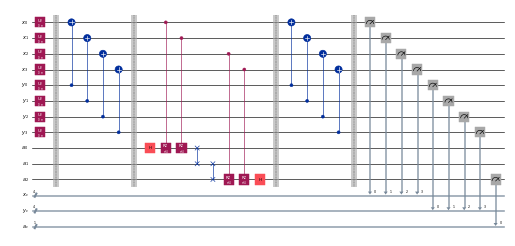

In [17]:
fig, ax = plt.subplots(1, 1)
circuit = hamdist_full_tomography_circuit(4, 3)
circuit.decompose(reps=1).draw(output="mpl", fold=-1, ax=ax)
fig.savefig(f"{circuit.name}.png", bbox_inches="tight")
fig.savefig(f"{circuit.name}.pdf", bbox_inches="tight")
fig.savefig(f"{circuit.name}.eps", bbox_inches="tight")

## Example of tomography on ideal simulator with 3 data qubits

In [18]:
n_data_qubits, n_auxilia_qubits = 3, 1

In [19]:
circuit = hamdist_full_tomography_circuit(n_data_qubits, n_auxilia_qubits).decompose(reps=1)
circuit.draw(fold=-1, idle_wires=False)

┌─────────┐ ░ ┌───┐           ░                                             ░ ┌───┐           ░ ┌─┐                  
    x_0: ┤ U2(0,π) ├─░─┤ X ├───────────░───────────■─────────────────────────────────░─┤ X ├───────────░─┤M├──────────────────
         ├─────────┤ ░ └─┬─┘┌───┐      ░           │                                 ░ └─┬─┘┌───┐      ░ └╥┘┌─┐               
    x_1: ┤ U2(0,π) ├─░───┼──┤ X ├──────░───────────┼──────────■──────────────────────░───┼──┤ X ├──────░──╫─┤M├───────────────
         ├─────────┤ ░   │  └─┬─┘┌───┐ ░           │          │                      ░   │  └─┬─┘┌───┐ ░  ║ └╥┘┌─┐            
    x_2: ┤ U2(0,π) ├─░───┼────┼──┤ X ├─░───────────┼──────────┼──────────■───────────░───┼────┼──┤ X ├─░──╫──╫─┤M├────────────
         ├─────────┤ ░   │    │  └─┬─┘ ░           │          │          │           ░   │    │  └─┬─┘ ░  ║  ║ └╥┘┌─┐         
    y_0: ┤ U2(0,π) ├─░───■────┼────┼───░───────────┼──────────┼──────────┼───────────░───■────┼────┼───░──╫──╫──╫─┤M├─────────
         ├─────────┤ ░        │    │   ░           │          │          │           ░        │    │   ░  ║  ║  ║ └╥┘┌─┐      
    y_1: ┤ U2(0,π) ├─░────────■────┼───░───────────┼──────────┼──────────┼───────────░────────■────┼───░──╫──╫──╫──╫─┤M├──────
         ├─────────┤ ░             │   ░           │          │          │           ░             │   ░  ║  ║  ║  ║ └╥┘┌─┐   
    y_2: ┤ U2(0,π) ├─░─────────────■───░───────────┼──────────┼──────────┼───────────░─────────────■───░──╫──╫──╫──╫──╫─┤M├───
         └─────────┘ ░                 ░ ┌───┐┌────┴────┐┌────┴────┐┌────┴────┐┌───┐ ░                 ░  ║  ║  ║  ║  ║ └╥┘┌─┐
      a: ────────────░─────────────────░─┤ H ├┤ Rz(π/3) ├┤ Rz(π/3) ├┤ Rz(π/3) ├┤ H ├─░─────────────────░──╫──╫──╫──╫──╫──╫─┤M├
                     ░                 ░ └───┘└─────────┘└─────────┘└─────────┘└───┘ ░                 ░  ║  ║  ║  ║  ║  ║ └╥┘
$x_c$: 3/═════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╬══╬══╬══╬═
                                                                                                          0  1  2  ║  ║  ║  ║ 
$y_c$: 3/══════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╬═
                                                                                                                   0  1  2  ║ 
$a_c$: 1/═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩═
                                                                                                                            0

### Get counts

In [20]:
from qiskit_aer import AerSimulator

ideal_simulator = AerSimulator()

In [21]:
shots = 2**9
shots

512

In [22]:
job = ideal_simulator.run(circuit, shots=shots)
result = job.result()
counts = result.get_counts(0)

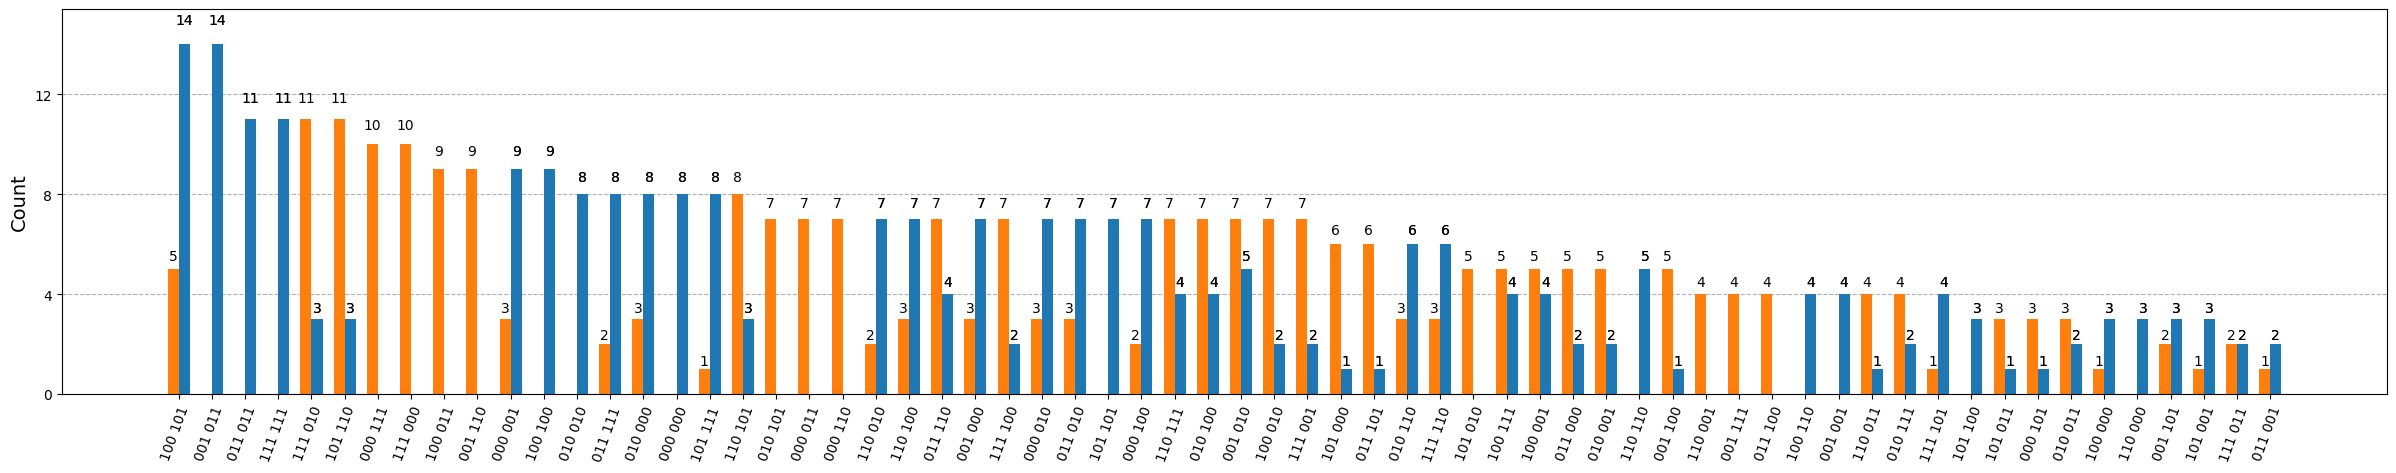

In [23]:
from qiskit.visualization import plot_histogram

even_counts = {k[2:]: v for k, v in counts.items() if k.startswith("0")}
odd_counts = {k[2:]: v for k, v in counts.items() if k.startswith("1")}

plot_histogram([even_counts, odd_counts], figsize=(30, 5), sort="value_desc")

### Process counts to amplitudes: Formate and Average

In [24]:
def stringify_state(state):
    """
    >>> stringify_state([[0, 0], [0, 1], [1, 1]])
    ['00', '01', '11']

    >>> stringify_state(4)
    ['00', '01', '10', '11']

    >>> stringify_state(8)
    ['000', '001', '010', '100', '011', '101', '110', '111']
    """
    if isinstance(state, int):
        n_data_qubits = int(log2(state))
        return sorted(
            [bin(i)[2:].zfill(n_data_qubits) for i in range(state)],
            key=lambda x: sum(int(i) for i in x),
        )
    return ["".join(map(str, s)) for s in state]

In [25]:
def formate_amplitudes(x, y, counts, lite):
    """Process counts average amplitudes"""
    nx = x if isinstance(x, int) else x.shape[0]
    ny = y if isinstance(y, int) else y.shape[0]

    ampl = np.zeros((nx, ny, 2))
    shots = sum(v for _, v in counts.items())
    noise_shots = 0

    xstates = {s: i for i, s in enumerate(stringify_state(x))}
    ystates = {s: i for i, s in enumerate(stringify_state(y))}
    astates = {"0": 0, "1": 1}

    for state, count in counts.items():
        astate, ystate, xstate = state.split()
        if lite:
            xstate = "".join(x.flatten().astype(str))

        if astate in astates and xstate in xstates and ystate in ystates:
            ampl[xstates[xstate], ystates[ystate], astates[astate]] = count

        else:
            noise_shots += count
            print(f"Excess state {state} with count {count}")

    if noise_shots:
        print(f"Noise shouts {noise_shots} form {shots}")

    # Averaging
    ampl /= shots - noise_shots
    ampl *= nx * ny
    np.clip(ampl, 0, 1, out=ampl)
    return ampl

In [26]:
def average_amplitudes(ampl):
    ampl = (ampl[:, :, 0] + (1 - ampl[:, :, 1])) / 2
    ampl = (ampl + ampl.T) / 2
    return ampl

In [27]:
x, y = 2**n_data_qubits, 2**n_data_qubits

In [28]:
ampl_formated = formate_amplitudes(x, y, counts, lite=False)

In [29]:
ampl_averaged = average_amplitudes(ampl_formated)

In [30]:
def heatmap(ax, mat, ylabels, xlabels, annotation=None, title=None, palette=None):
    if palette:
        ax.imshow(palette[mat], origin="lower", cmap="gray")

    else:
        ax.imshow(mat, origin="lower", cmap="gray")

    ax.set_xticks(range(0, len(xlabels)))
    ax.set_xticklabels(xlabels, rotation=90, fontsize="20")
    ax.set_yticks(range(0, len(ylabels)))
    ax.set_yticklabels(ylabels, fontsize="20")
    if title:
        ax.set_title(title, fontsize="20")

    if annotation is not None:
        for i in range(annotation.shape[0]):
            for j in range(annotation.shape[1]):
                ax.text(j, i, annotation[i, j], ha="center", va="center", color="#FF0000", fontsize="20")

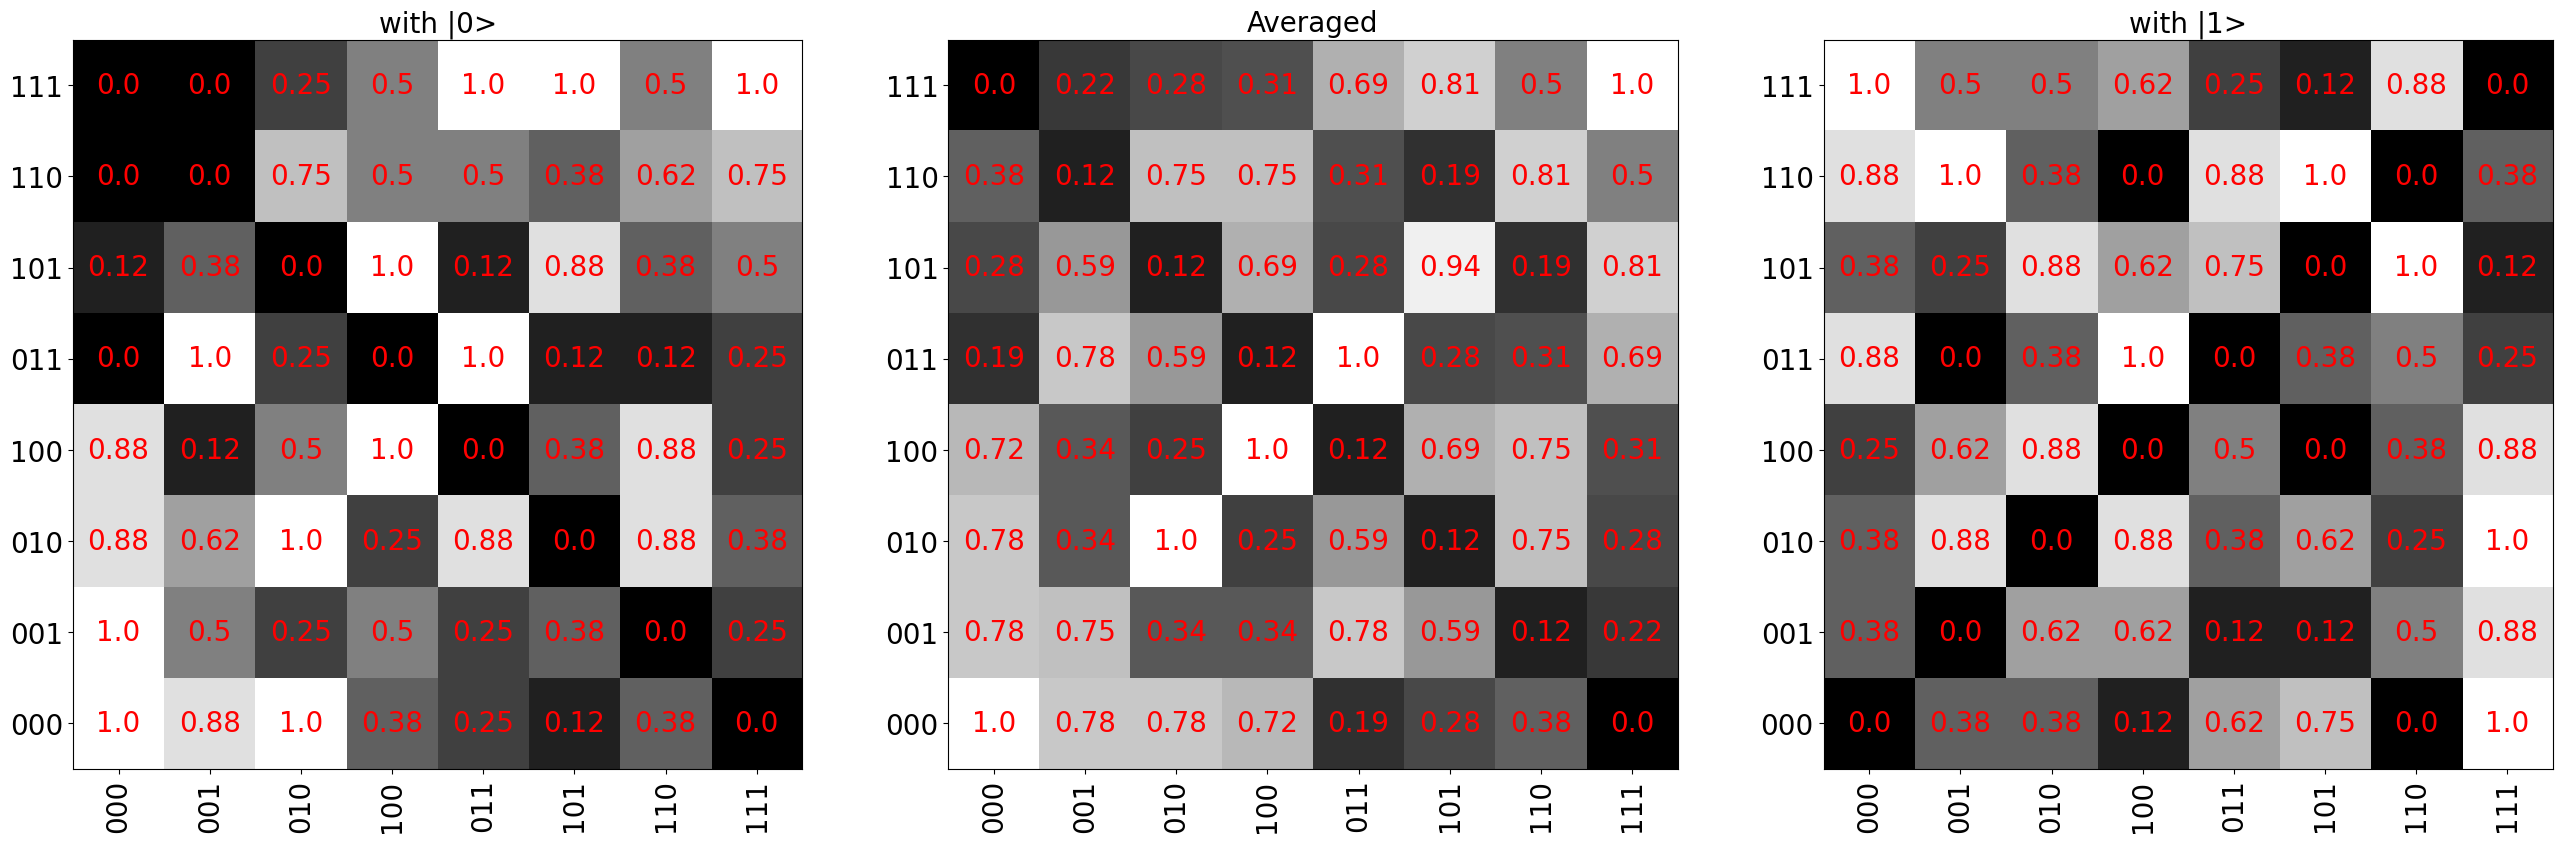

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(32, 10))

xlabels, ylabels = stringify_state(x), stringify_state(y)

heatmap(
    axes[0],
    ampl_formated[:, :, 0],
    xlabels,
    ylabels,
    annotation=ampl_formated[:, :, 0].round(2),
    title="with |0>",
)
heatmap(
    axes[1],
    ampl_averaged,
    xlabels,
    ylabels,
    annotation=ampl_averaged.round(2),
    title="Averaged",
)
heatmap(
    axes[2],
    ampl_formated[:, :, 1],
    xlabels,
    ylabels,
    annotation=ampl_formated[:, :, 1].round(2),
    title="with |1>",
)

### Extract Hamming distance

In [32]:
def extract_hamming_distance(x, y, ampl):
    n_data_qubits = min_qubits_for_data_encoding(x)
    return np.arccos(np.sqrt(ampl)) * 2 * n_data_qubits / pi

In [33]:
hdist = extract_hamming_distance(x, y, ampl_averaged)

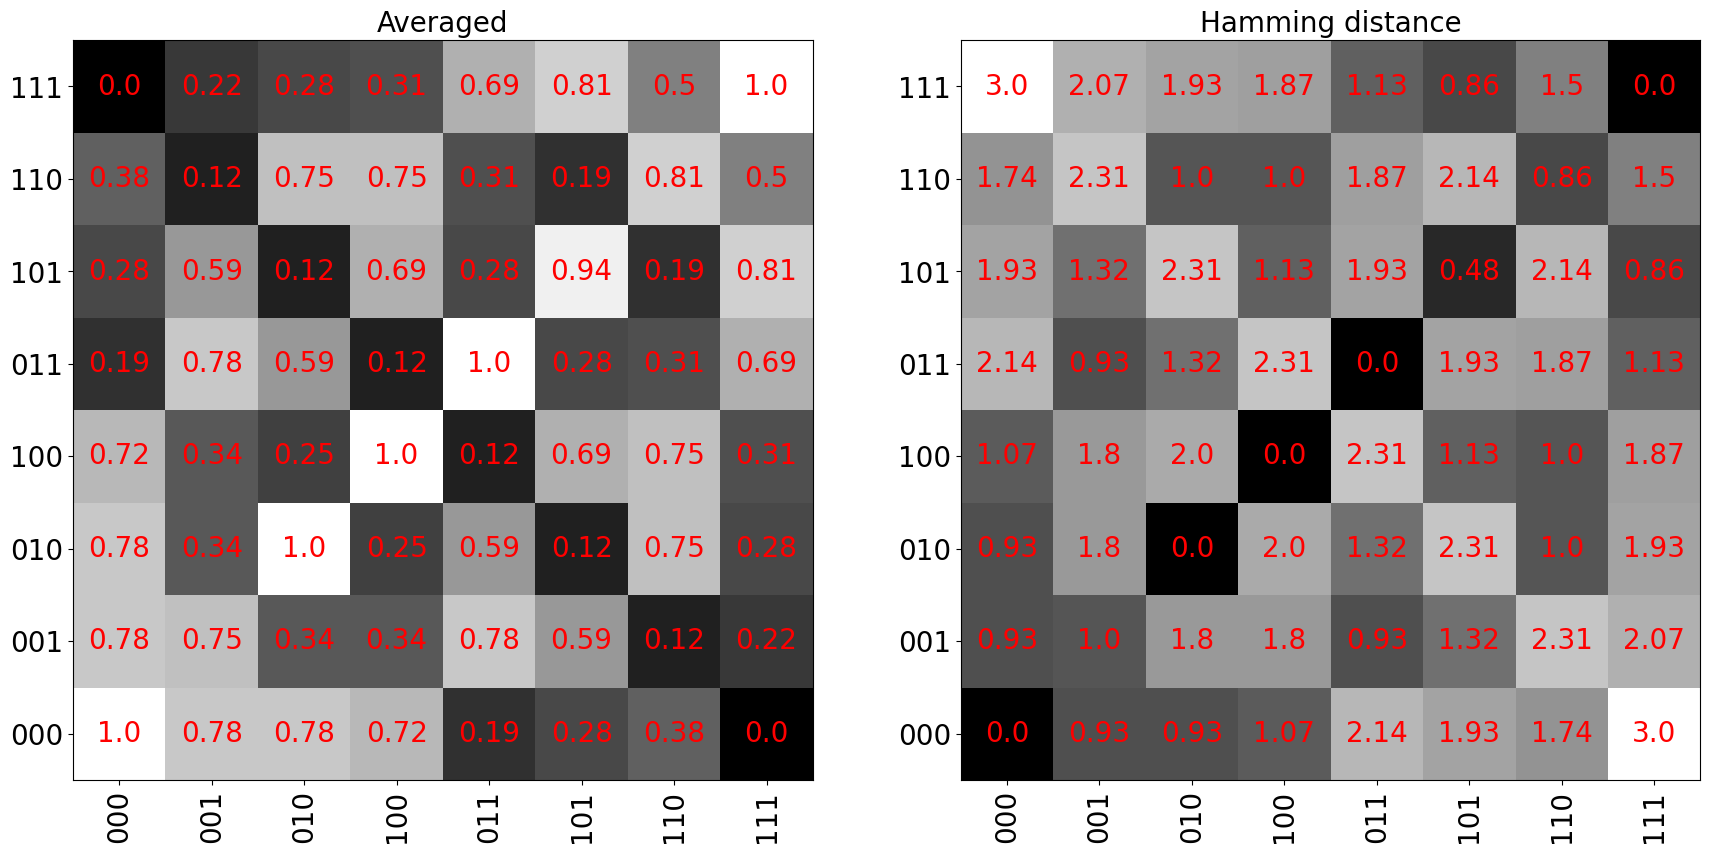

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(21, 10))

xlabels, ylabels = stringify_state(x), stringify_state(y)

heatmap(
    axes[0],
    ampl_averaged,
    xlabels,
    ylabels,
    annotation=ampl_averaged.round(2),
    title="Averaged",
)
heatmap(
    axes[1],
    hdist,
    xlabels,
    ylabels,
    annotation=hdist.round(2),
    title="Hamming distance",
)

### Fit limit and neighbors

In [35]:
from scipy.spatial import distance


def _arrify_state(state):
    if isinstance(state, np.ndarray):
        return state
    if isinstance(state, int):
        return np.array([list(map(int, s)) for s in stringify_state(state)])


def hdist_exact(x, y):
    x_arr = _arrify_state(x)
    y_arr = _arrify_state(y)
    hdist = distance.cdist(x_arr, y_arr, metric="hamming") * x_arr.shape[1]
    return hdist


def fit_neighbors(x, y, hdist, limit):
    neighbors = hdist < limit
    hdist_expected = hdist_exact(x, y)
    neighbors_expected = hdist_expected < limit
    x_arr = _arrify_state(x)
    y_arr = _arrify_state(y)
    errors = np.array([[" "] * x_arr.shape[0] for _ in range(y_arr.shape[0])])
    errors[(neighbors_expected != neighbors) & neighbors_expected] = "?"
    errors[(neighbors_expected != neighbors) & ~neighbors_expected] = "x"

    return neighbors, neighbors_expected, errors

In [36]:
def n_error(x, y, hdist, l):
    _, n, err = fit_neighbors(x, y, hdist, l)
    return (err != " ").sum() / 2

In [37]:
def fit_limit(x, y, hdist, neighbour, full=False, a_tol=None, ax=None):
    a_tol = a_tol or 1e-1
    limits_start, limits_end = neighbour + a_tol, neighbour + 1 - a_tol
    limits_steps = np.ceil((limits_end - limits_start) / a_tol).astype(int)

    limits = np.linspace(limits_start, limits_end, limits_steps)
    n_errors = [n_error(x, y, hdist, l) for l in limits]
    argmin_n_errors = np.argmin(n_errors)
    limit, error = limits[argmin_n_errors], n_errors[argmin_n_errors]
    if ax is not None:
        if full:
            limits_start, limits_end = 0, min_qubits_for_data_encoding(x)
            limits_steps = np.ceil((limits_end - limits_start) / a_tol).astype(int)
            limits = np.linspace(limits_start, limits_end, limits_steps)
            n_errors = [n_error(x, y, hdist, l) for l in limits]
        ax.plot(limits, n_errors)
        ax.plot([limit] * 2, (0, max(n_errors)))
        ax.set_xlabel("limit value")
        ax.set_ylabel("err")
        ax.grid()
    return limit, error

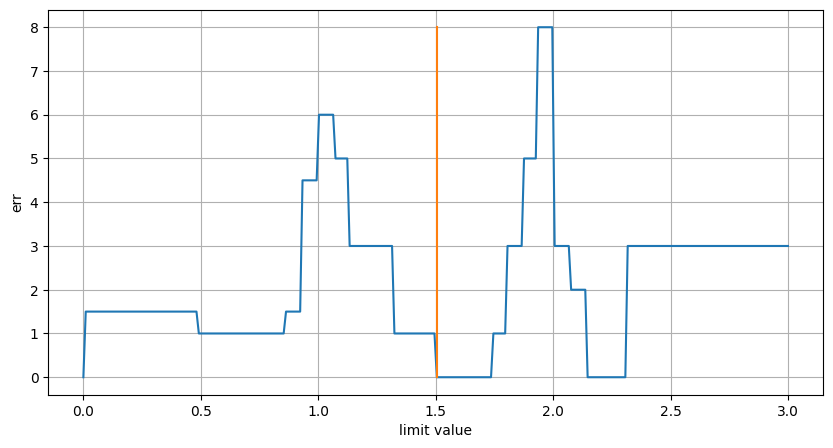

In [38]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))

limit, error = fit_limit(x, y, hdist, 1, full=True, a_tol=1e-2, ax=ax)

In [39]:
neighbors, neighbors_expected, errors = fit_neighbors(x, y, hdist, limit)

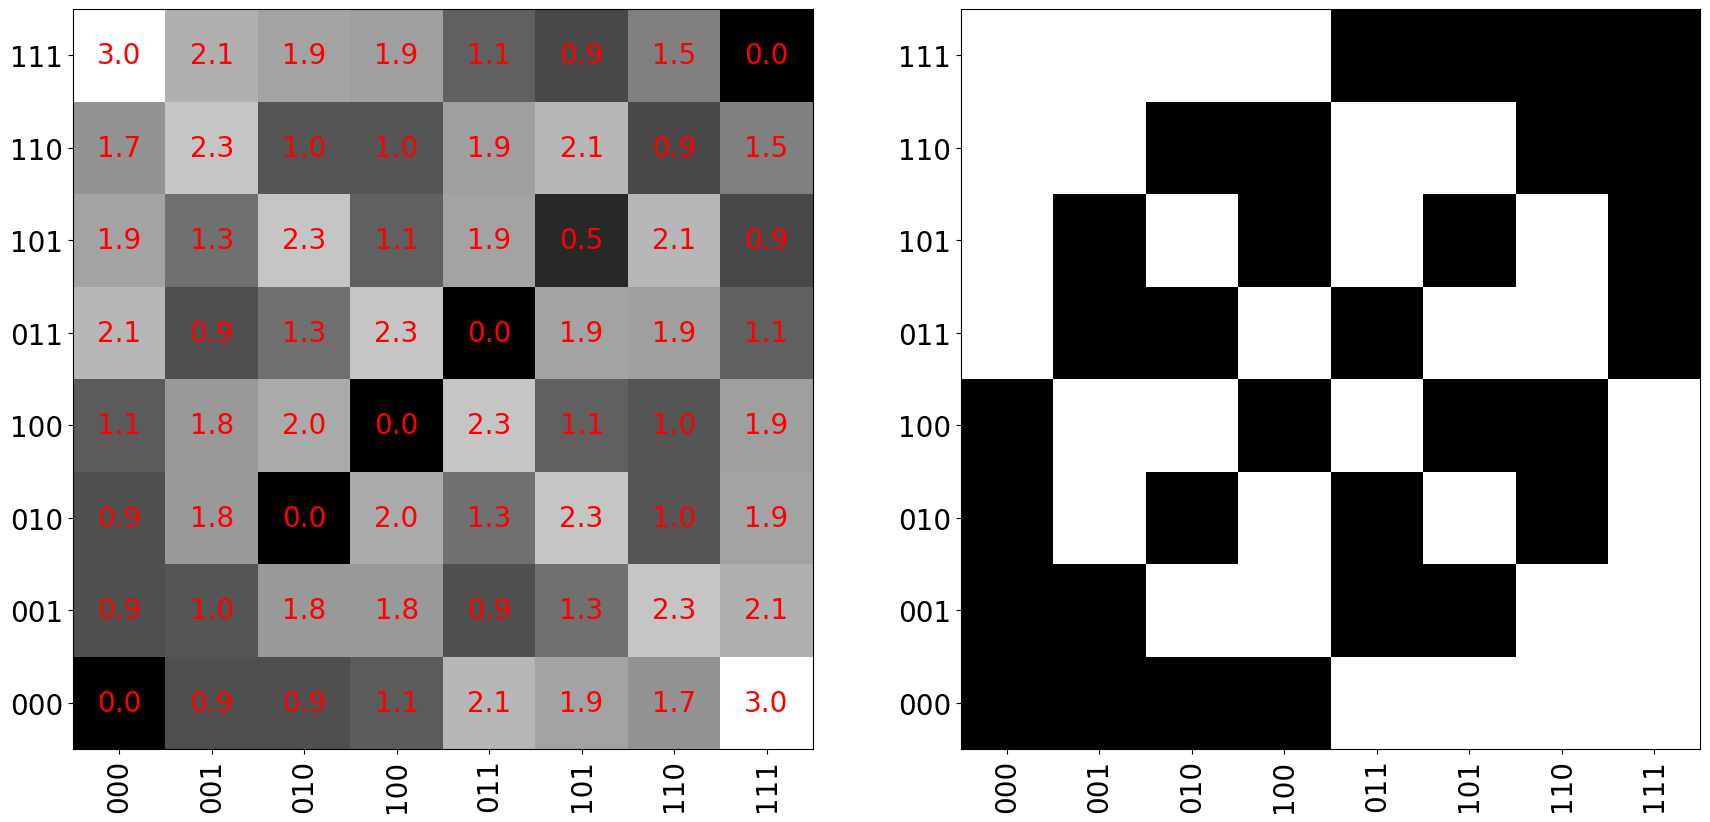

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(21, 10))

xlabels, ylabels = stringify_state(x), stringify_state(y)

heatmap(axes[0], hdist, xlabels, ylabels, annotation=hdist.round(1))
heatmap(axes[1], ~neighbors, xlabels, ylabels, annotation=errors)

## IBM backend

In [38]:
from qiskit_ibm_runtime import QiskitRuntimeService

%time service = QiskitRuntimeService()

CPU times: user 335 ms, sys: 51.2 ms, total: 387 ms
Wall time: 6.94 s


In [39]:
%time print(*(s.name for s in service.backends()), sep="\n")

ibm_brisbane
ibm_kyiv
ibm_sherbrooke
CPU times: user 143 ms, sys: 11.3 ms, total: 154 ms
Wall time: 5.83 s


In [40]:
ibm_backend = service.backend("ibm_sherbrooke")

### Transpiling

In [41]:
def transpile(circuit, backend, maps=None):
    cicruit_name = circuit.name
    if maps is None:
        from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

        pm = generate_preset_pass_manager(target=backend.target, optimization_level=3)
        circuit = pm.run(circuit)
        circuit.name = f"{cicruit_name}-auto_tanspiled"
        return circuit

    from collections import ChainMap

    layout = dict(ChainMap(*({r[i]: v for i, v in enumerate(map_)} for r, map_ in zip(circuit.qregs, maps))))
    import qiskit.compiler

    circuit = qiskit.compiler.transpile(circuit, backend, initial_layout=layout)
    circuit.name = f"{cicruit_name}-manual_tanspiled"
    return circuit

## Research of tomography on noise simulator

In [42]:
def hdist_tomography_from_result(result, x, y):
    counts = result.get_counts(0)
    ampl = formate_amplitudes(x, y, counts, lite=False)
    ampl = average_amplitudes(ampl)
    hdist = extract_hamming_distance(x, y, ampl)
    return hdist

In [43]:
%time noise_simulator = AerSimulator.from_backend(ibm_backend)

CPU times: user 2.21 s, sys: 26.5 ms, total: 2.23 s
Wall time: 6.73 s


### Example of tomography on noise simulator with auto transpiling and swaped ancilla

In [44]:
n_data_qubits, n_auxilia_qubits = 5, 5

In [45]:
shots = 120_000
shots

120000

In [46]:
circuit = hamdist_full_tomography_circuit(n_data_qubits, n_auxilia_qubits).decompose(reps=5)
circuit = transpile(circuit, ibm_backend)
circuit.draw(fold=-1, idle_wires=False)

global phase: π/4
           ┌─────────┐┌────┐┌─────────┐ ░ ┌──────────┐┌────┐  ┌─────────┐   ┌──────┐ ┌─────────┐ ┌────┐ ┌────────┐  ░                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ░ ┌──────────┐┌────┐  ┌─────────┐   ┌──────┐ ┌─────────┐ ┌────┐ ┌────────┐  ░                ┌─┐         
 y_1 -> 98 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(-π/2) ├┤ √X ├──┤ Rz(π/2) ├───┤1     ├─┤ Rz(π/2) ├─┤ √X ├─┤ Rz(-π) ├──░─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░─┤ Rz(-π/2) ├┤ √X ├──┤ Rz(π/2) ├───┤1     ├─┤ Rz(π/2) ├─┤ √X ├─┤ Rz(-π) ├──░────────────────┤M├─────────
           ├─────────┤├────┤├─────────┤ ░ ├─────────┬┘├────┤┌─┴─────────┴──┐│  Ecr │┌┴─────────┴┐├────┤┌┴────────┴┐ ░ ┌─────────┐                                                                                            ┌──────┐                                  ┌──────┐┌──────────┐                                                                                                                                                                                                                                                                                                                                                                                                   ░ ├─────────┬┘├────┤┌─┴─────────┴──┐│  Ecr │┌┴─────────┴┐├────┤┌┴────────┴┐ ░    ┌─┐         └╥┘         
 x_1 -> 99 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(π/2) ├─┤ √X ├┤ Rz(-0.44777) ├┤0     ├┤ Rz(1.123) ├┤ √X ├┤ Rz(-π/2) ├─░─┤ Rz(π/2) ├────────────────────────────────────────────────────────────────────────────────────────────┤0     ├──────────────────────────────────┤0     ├┤ Rz(-π/2) ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░─┤ Rz(π/2) ├─┤ √X ├┤ Rz(-0.44777) ├┤0     ├┤ Rz(1.123) ├┤ √X ├┤ Rz(-π/2) ├─░────┤M├──────────╫──────────
           └─────────┘└────┘└─────────┘ ░ └─────────┘ └────┘└──────────────┘└──────┘└───────────┘└────┘└──────────┘ ░ ├─────────┤   ┌────┐  ┌──────────────┐┌──────┐┌────────┐┌────┐┌──────────┐┌────┐┌──────┐┌─────────────┐│  Ecr │┌────────┐┌────┐┌──────────┐┌────┐│  Ecr │└┬────────┬┘┌────┐┌─────────┐┌──────┐┌─────────┐ ┌────┐          ┌──────┐┌──────────┐                 ┌──────┐┌─────────┐ ┌────┐┌──────────┐                                                                                                                                                                                                                                                                   ░ └─────────┘ └────┘└──────────────┘└──────┘└───────────┘└────┘└──────────┘ ░    └╥┘          ║          
a_0 -> 100 ─────────────────────────────░─────────────────────────────────────────────────────────────

In [47]:
def run_on_backend(backend, cricuit, shots: int, cache=True) -> qiskit.result.Result:
    path = Path.cwd() / "assets" / f"result-{circuit.name}-{backend.name}-{shots}.json"
    if cache and path.exists():
        print(f"Result already exist on '{path.relative_to(Path.cwd())}'!")
        result = qiskit.result.Result.from_dict(json.loads(path.read_text()))
        return result
    job = backend.run(circuit, shots=shots)
    result = job.result()
    if cache:
        print(f"Result of shots={shots} saved on '{path.relative_to(Path.cwd())}'!")
        path.write_text(json.dumps(result.to_dict()))
    return result

In [48]:
%time result = run_on_backend(noise_simulator, circuit, shots)

Result already exist on 'assets/result-hd_full_tomography-circuit-nd5-na5-auto_tanspiled-aer_simulator_from(ibm_sherbrooke)-120000.json'!
CPU times: user 477 μs, sys: 146 μs, total: 623 μs
Wall time: 558 μs


In [49]:
x, y = 2**n_data_qubits, 2**n_data_qubits
%time hdist = hdist_tomography_from_result(result, x, y)

CPU times: user 5.29 ms, sys: 0 ns, total: 5.29 ms
Wall time: 5.23 ms


1.808144329896907 0.0
2.4 0.0


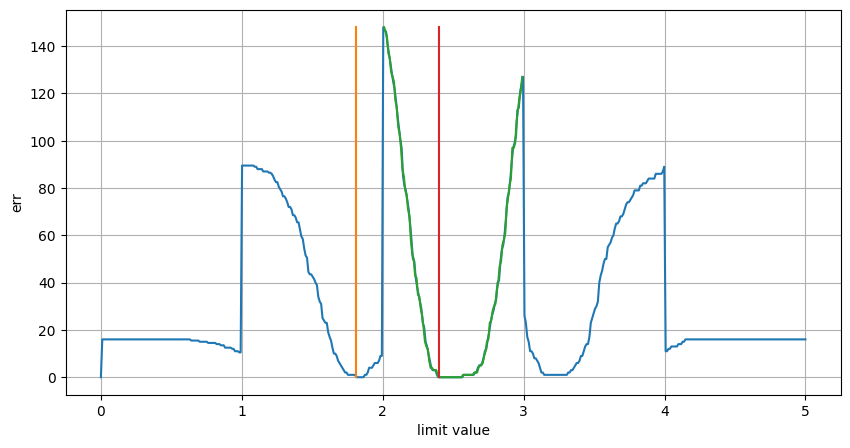

In [50]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))

limit, error = fit_limit(x, y, hdist, 1, full=True, a_tol=1e-2, ax=ax)
print(limit, error)
limit, error = fit_limit(x, y, hdist, 2, full=False, a_tol=1e-2, ax=ax)
print(limit, error)
ax.grid()

### Research min number of shots

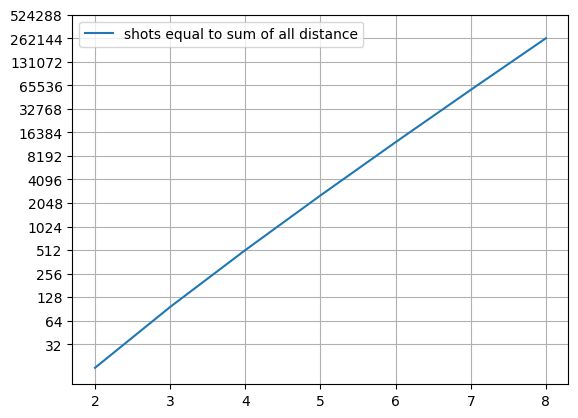

In [46]:
_, ax = plt.subplots(1, 1)
data_qubits_span = list(range(2, 9))
min_shots_span = [hdist_exact(2**i, 2**i).sum() for i in data_qubits_span]
ax.plot(data_qubits_span, min_shots_span, label="shots equal to sum of all distance")
ax.set_yscale("log", base=2)
ax.set_yticks([2**i for i in range(5, 20)])
ax.set_yticklabels([2**i for i in range(5, 20)])
ax.grid()
ax.legend()

### Reserch optimal number of shots

In [47]:
import joblib
from tqdm import tqdm


def neighbors_errors_over_shots(circuit, x, y, backend, shots_span=None, n_jobs=1):
    n_data_qubits = min_qubits_for_data_encoding(x)
    shots_span = shots_span or np.linspace(1024, 2**14, 51)

    def _estimate_errors(circuit, backend, shots, x, y):
        job = backend.run(circuit, shots=shots)
        result = job.result()
        hdist = hdist_tomography_from_result(result, x, y)
        errs = [fit_limit(x, y, hdist, neighbour=n) for n in range(1, n_data_qubits // 2 + 1)]
        return errs

    errors = joblib.Parallel(n_jobs=n_jobs)(
        joblib.delayed(_estimate_errors)(circuit, backend, s, x, y) for s in tqdm(shots_span)
    )

    return shots_span, errors

In [ ]:
shots_span, errors = neighbors_errors_over_shots(circuit, x, y, noise_simulator, n_jobs=-2)

In [ ]:
limits_and_errors1, limits_and_errors2 = list(zip(*errors))

In [ ]:
limit_span1, error_span_1 = list(zip(*limits_and_errors1))

In [ ]:
limit_span2, error_span_2 = list(zip(*limits_and_errors2))

7475.2 0.0
8089.599999999999 0.0


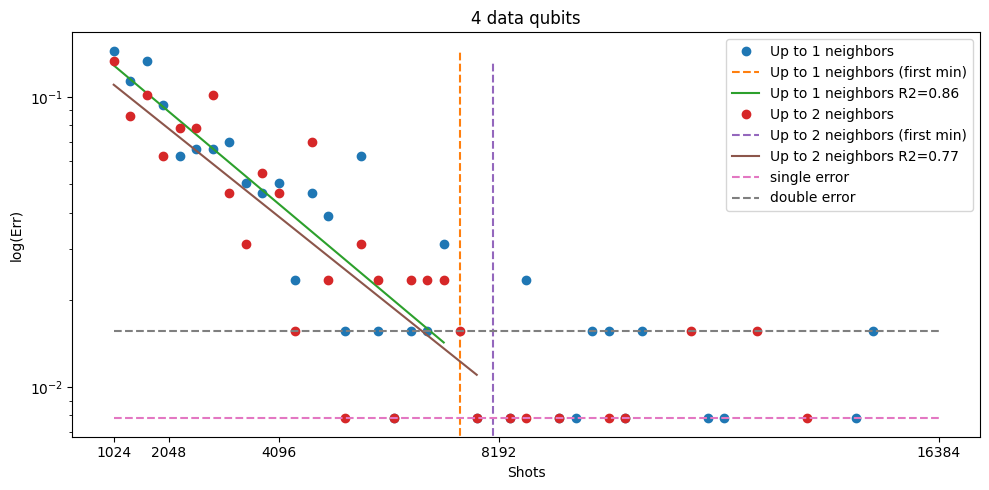

In [ ]:
def line(x, a, b):
    return a * x + b


from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

_, ax = plt.subplots(1, 1, figsize=(10, 5))
for i, err_span in enumerate((error_span_1, error_span_2), 1):
    ax.plot(shots_span, err_span, "o", label=f"Up to {i} neighbors")
    err_span_argmin = np.argmin(err_span)
    errors_last_, shots_span_ = err_span[:err_span_argmin], shots_span[:err_span_argmin]
    params, params_covariance = curve_fit(line, shots_span_, np.log(errors_last_), p0=(1e-3, 1))
    # print(params, params_covariance)
    r2 = r2_score(errors_last_, np.exp(line(shots_span_, *params)))
    ax.plot(
        (shots_span[err_span_argmin], shots_span[err_span_argmin]),
        (0, max(err_span)),
        "--",
        label=f"Up to {i} neighbors (first min)",
    )
    print(shots_span[err_span_argmin], err_span[err_span_argmin])
    ax.plot(
        shots_span_,
        np.exp(func(shots_span_, *params)),
        label=f"Up to {i} neighbors R2={r2:.2}",
    )

    # min_single_error_rate = 1 / (
    #     2**(2 * min_qubits_for_data_encoding(x)) / 2 + 2**min_qubits_for_data_encoding(x) / 2
    # )
min_single_error_rate = 2 / 2 ** (2 * min_qubits_for_data_encoding(x))
min_double_error_rate = 4 / 2 ** (2 * min_qubits_for_data_encoding(x))
ax.plot(
    shots_span,
    [min_single_error_rate for _ in range(len(shots_span))],
    "--",
    label="single error",
)
ax.plot(
    shots_span,
    [min_double_error_rate for _ in range(len(shots_span))],
    "--",
    label="double error",
)

ax.set_yscale("log")
ax.set_xlabel("Shots")
ax.set_ylabel("log(Err)")
ax.set_xticks([2**n for n in range(10, 15)])
ax.legend()
ax.set_title(f"{min_qubits_for_data_encoding(x)} data qubits")
plt.tight_layout()
plt.savefig(f"./err_log-shots-n{min_qubits_for_data_encoding(x)}.pdf")

## Tomography on IBMQ 

### 4 data qubits with manual transpiling and ancillas swapping 

In [48]:
x, y, n_auxilia_qubits = 16, 16, 3

In [49]:
circuit = hamdist_tomography_circuit(x, y, n_auxilia_qubits, False).decompose(reps=5)

maps = [[99, 101, 117, 119], [98, 102, 116, 120], [100, 110, 118]]
circuit = transpile(circuit, ibm_backend, maps=maps)
circuit.draw(fold=-1, idle_wires=False)

global phase: 3π/4
           ┌─────────┐┌────┐┌─────────┐ ░    ┌────┐   ┌──────────┐          ┌──────┐┌──────────┐┌────┐┌─────────┐ ░                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 ░    ┌────┐   ┌──────────┐          ┌──────┐┌──────────┐┌────┐┌─────────┐ ░             ┌─┐            
 y_0 -> 98 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░────┤ √X ├───┤ Rz(-π/2) ├──────────┤1     ├┤ Rz(-π/2) ├┤ √X ├┤ Rz(π/2) ├─░─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░────┤ √X ├───┤ Rz(-π/2) ├──────────┤1     ├┤ Rz(-π/2) ├┤ √X ├┤ Rz(π/2) ├─░─────────────┤M├────────────
           ├─────────┤├────┤├─────────┤ ░ ┌──┴────┴──┐└──┬────┬──┘┌────────┐│  Ecr │├─────────┬┘├────┤├─────────┤ ░ ┌──────────┐                              ┌──────┐   ┌───┐    ┌──────────┐          ┌──────┐    ┌───┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ░ ┌──┴────┴──┐└──┬────┬──┘┌────────┐│  Ecr │├─────────┬┘├────┤├─────────┤ ░ ┌─┐         └╥┘            
 x_0 -> 99 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(-π/2) ├───┤ √X ├───┤ Rz(-π) ├┤0     ├┤ Rz(π/2) ├─┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(-π/2) ├──────────────────────────────┤0     ├───┤ X ├────┤ Rz(-π/2) ├──────────┤0     ├────┤ X ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░─┤ Rz(-π/2) ├───┤ √X ├───┤ Rz(-π) ├┤0     ├┤ Rz(π/2) ├─┤ √X ├┤ Rz(π/2) ├─░─┤M├──────────╫─────────────
           └─────────┘└────┘└─────────┘ ░ └──────────┘   └────┘   └────────┘└──────┘└─────────┘ └────┘└─────────┘ ░ ├──────────┤   ┌────┐   ┌──────────┐┌────┐│  Ecr │┌──┴───┴───┐└──┬────┬──┘┌────────┐│  Ecr │┌───┴───┴───┐┌────┐┌────────┐┌──────┐┌──────────┐   ┌────┐   ┌────────┐┌──────┐┌────────┐┌────┐┌────────┐┌──────┐   ┌────┐   ┌──────────┐┌──────┐ ┌────────┐┌────┐┌─────────┐┌──────┐                                                                                                                                                                                                                                                                                               ░ └──────────┘   └────┘   └────────┘└──────┘└─────────┘ └────┘└─────────┘ ░ └╥┘          ║             
a_0 -> 100 ─────────────────────────────░────────────────────────────────────────

In [50]:
shots = 2**13
shots

8192

In [51]:
job = service.job("cw89p5r9ezk00080zv40")

In [52]:
result = job.result()
hdist = hdist_tomography_from_result(result, x, y)

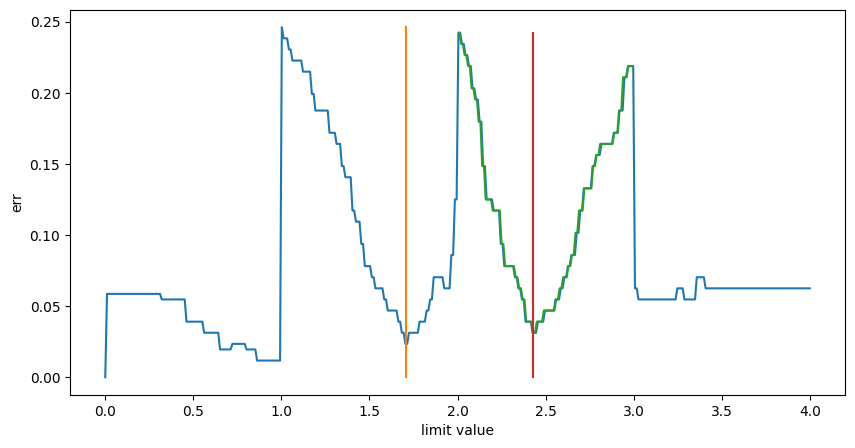

In [53]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))

limit1, error1 = fit_limit(x, y, hdist, 1, full=True, a_tol=1e-2, ax=ax)
limit2, error2 = fit_limit(x, y, hdist, 2, full=False, a_tol=1e-2, ax=ax)

In [54]:
neighbors, neighbors_expected, errors = fit_neighbors(x, y, hdist, limit2)

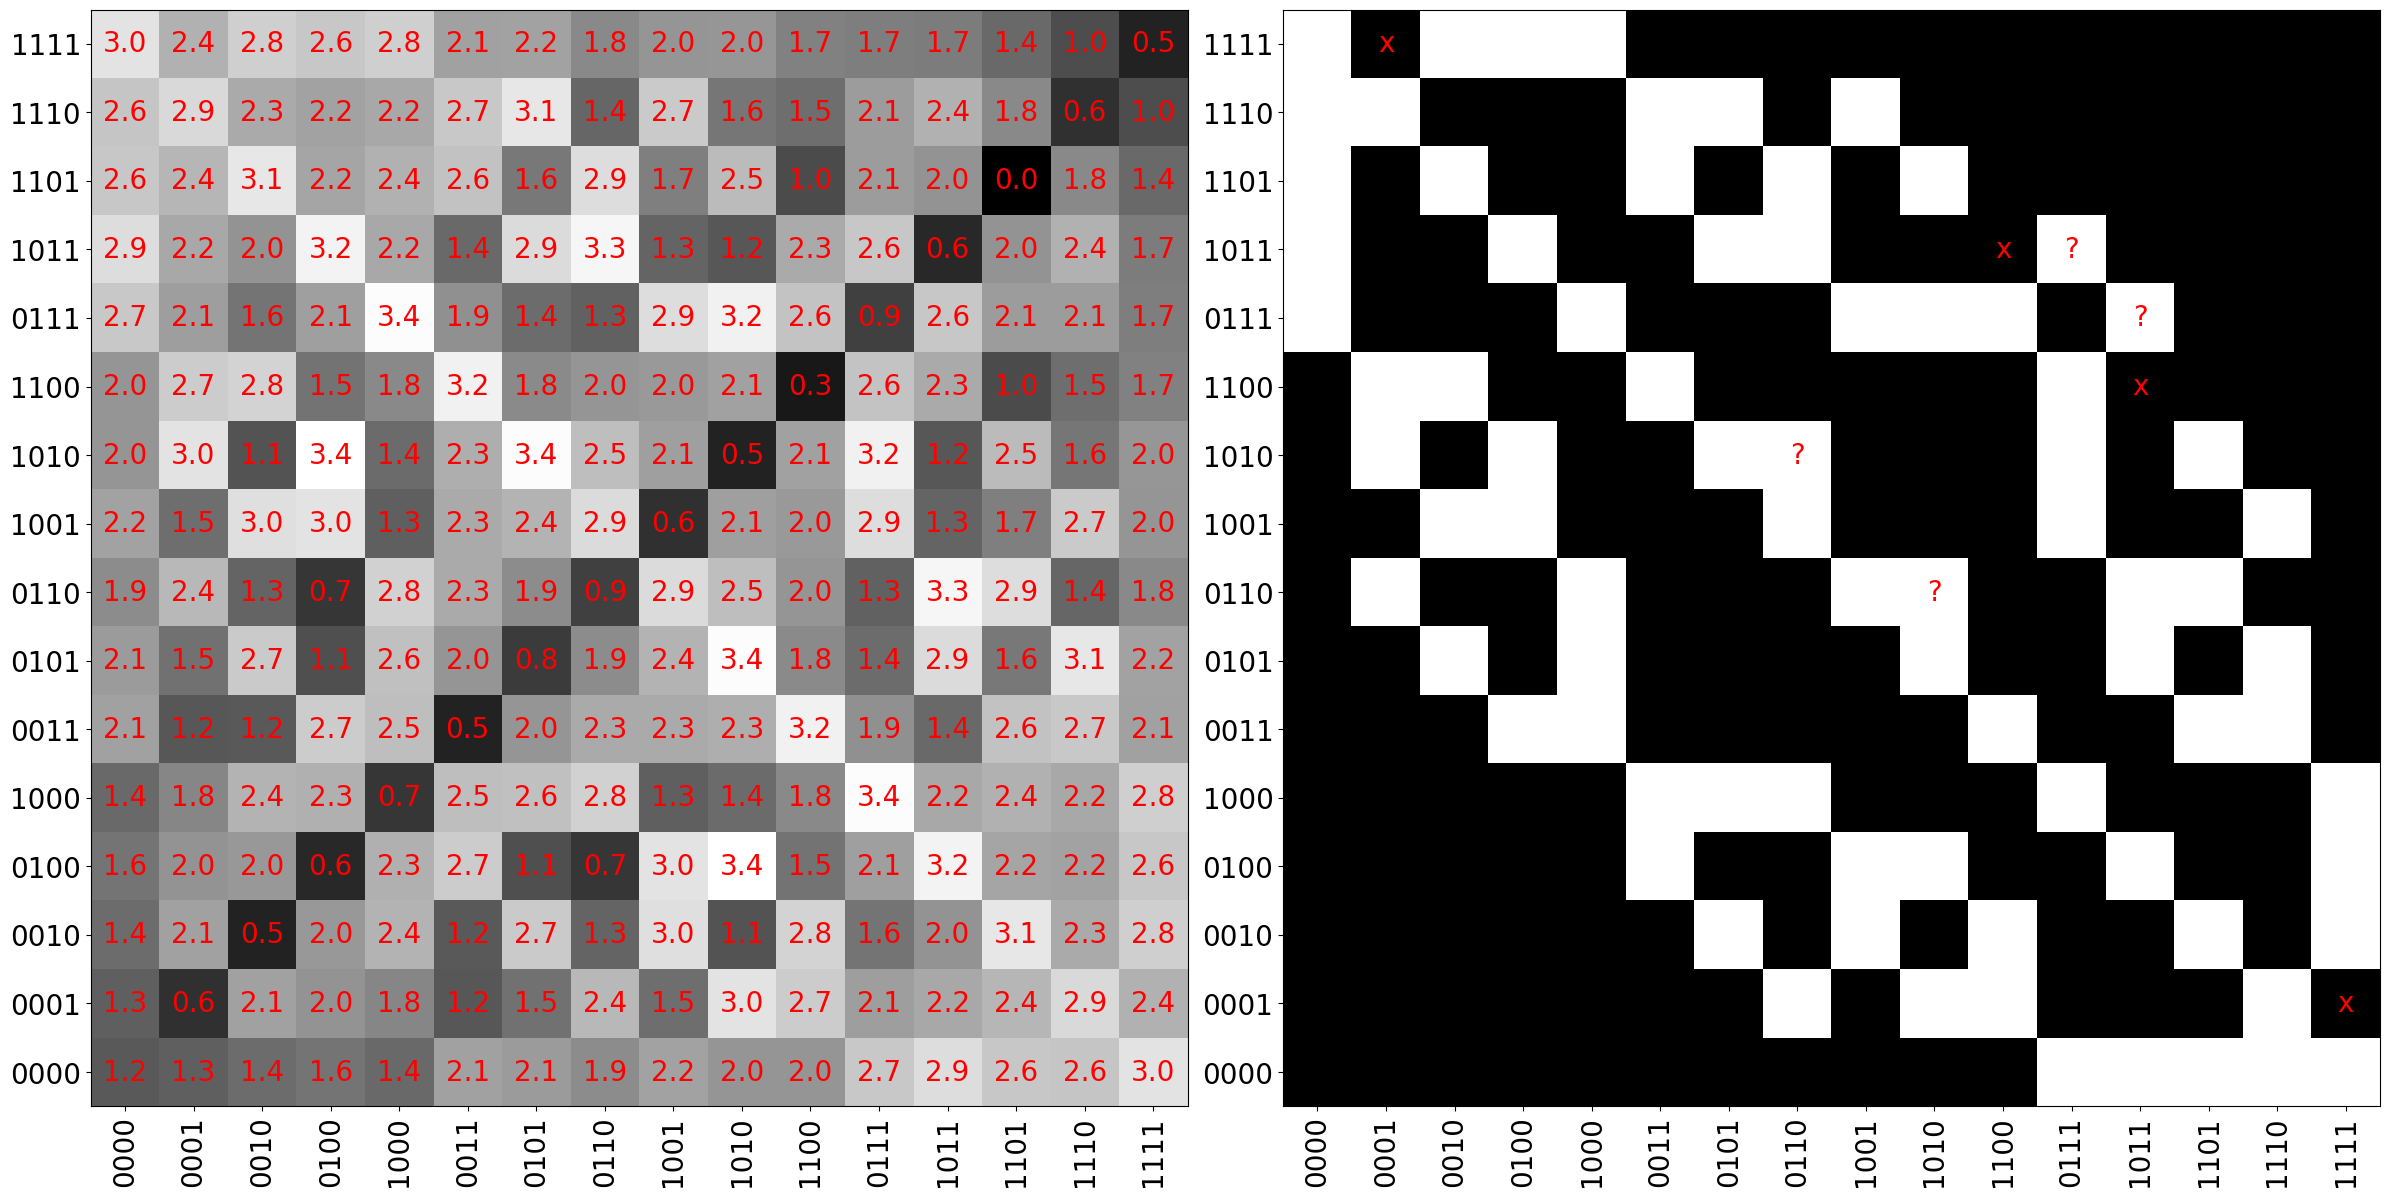

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

xlabels, ylabels = stringify_state(x), stringify_state(y)

heatmap(axes[0], hdist, xlabels, ylabels, annotation=hdist.round(1))
heatmap(axes[1], ~neighbors, xlabels, ylabels, annotation=errors)
fig.tight_layout()

### 5 data qubits with manual transpiling and ancillas swapping 

In [56]:
x, y, n_auxilia_qubits = 32, 32, 5

In [57]:
circuit = hamdist_tomography_circuit(x, y, n_auxilia_qubits, False).decompose(reps=5)

maps = [[109, 95, 91, 101, 110], [114, 94, 79, 102, 118], [96, 97, 98, 99, 100]]
circuit = transpile(circuit, ibm_backend, maps=maps)
circuit.draw(fold=-1, idle_wires=False)

global phase: π
           ┌─────────┐┌────┐┌─────────┐ ░ ┌──────────┐                      ┌──────┐   ┌───┐                                       ░                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ░ ┌──────────┐                      ┌──────┐   ┌───┐                                       ░                      ┌─┐         
 y_2 -> 79 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(-π/2) ├──────────────────────┤0     ├───┤ X ├───────────────────────────────────────░───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░─┤ Rz(-π/2) ├──────────────────────┤0     ├───┤ X ├───────────────────────────────────────░──────────────────────┤M├─────────
           ├─────────┤├────┤├─────────┤ ░ └┬────────┬┘   ┌────┐   ┌────────┐│  Ecr │   └───┘                                       ░    ┌────┐   ┌──────────┐                                                                                                                                                                                                                                                                                                                                                                                              ┌──────┐   ┌────┐                           ┌──────┐┌──────────┐   ┌────┐  ┌─────────┐                                                                                                                                                                                                                                                                                                                                                                      ░ └┬────────┬┘   ┌────┐   ┌────────┐│  Ecr │   └───┘                                       ░       ┌─┐            └╥┘         
 x_2 -> 91 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──┤ Rz(-π) ├────┤ √X ├───┤ Rz(-π) ├┤1     ├───────────────────────────────────────────────░────┤ √X ├───┤ Rz(-π/2) ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1     ├───┤ √X ├───────────────────────────┤1     ├┤ Rz(-π/2) ├───┤ √X ├──┤ Rz(π/2) ├─────────────────────────────

In [58]:
shots = 2**16
shots

65536

In [59]:
job = service.job("cw89yhajyrs0008gtfwg")

In [60]:
result = job.result()
hdist = hdist_tomography_from_result(result, x, y)

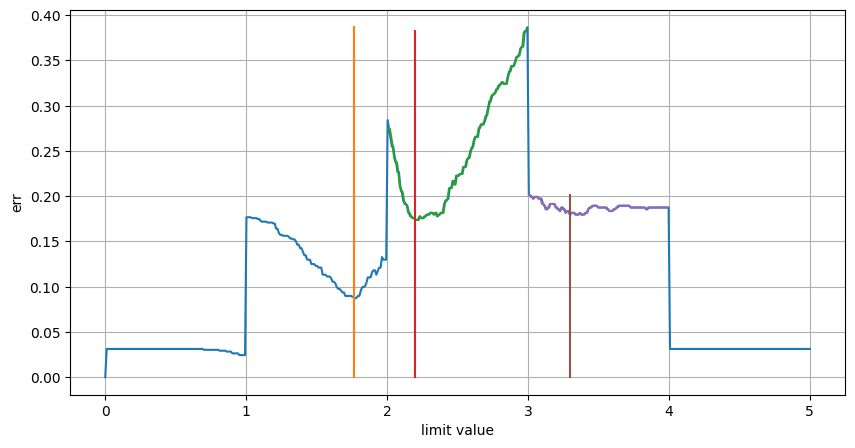

In [61]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))

limit1, error1 = fit_limit(x, y, hdist, 1, full=True, a_tol=1e-2, ax=ax)
limit2, error2 = fit_limit(x, y, hdist, 2, full=False, a_tol=1e-2, ax=ax)
limit3, error3 = fit_limit(x, y, hdist, 3, full=False, a_tol=1e-2, ax=ax)

In [62]:
neighbors, neighbors_expected, errors = fit_neighbors(x, y, hdist, limit2)

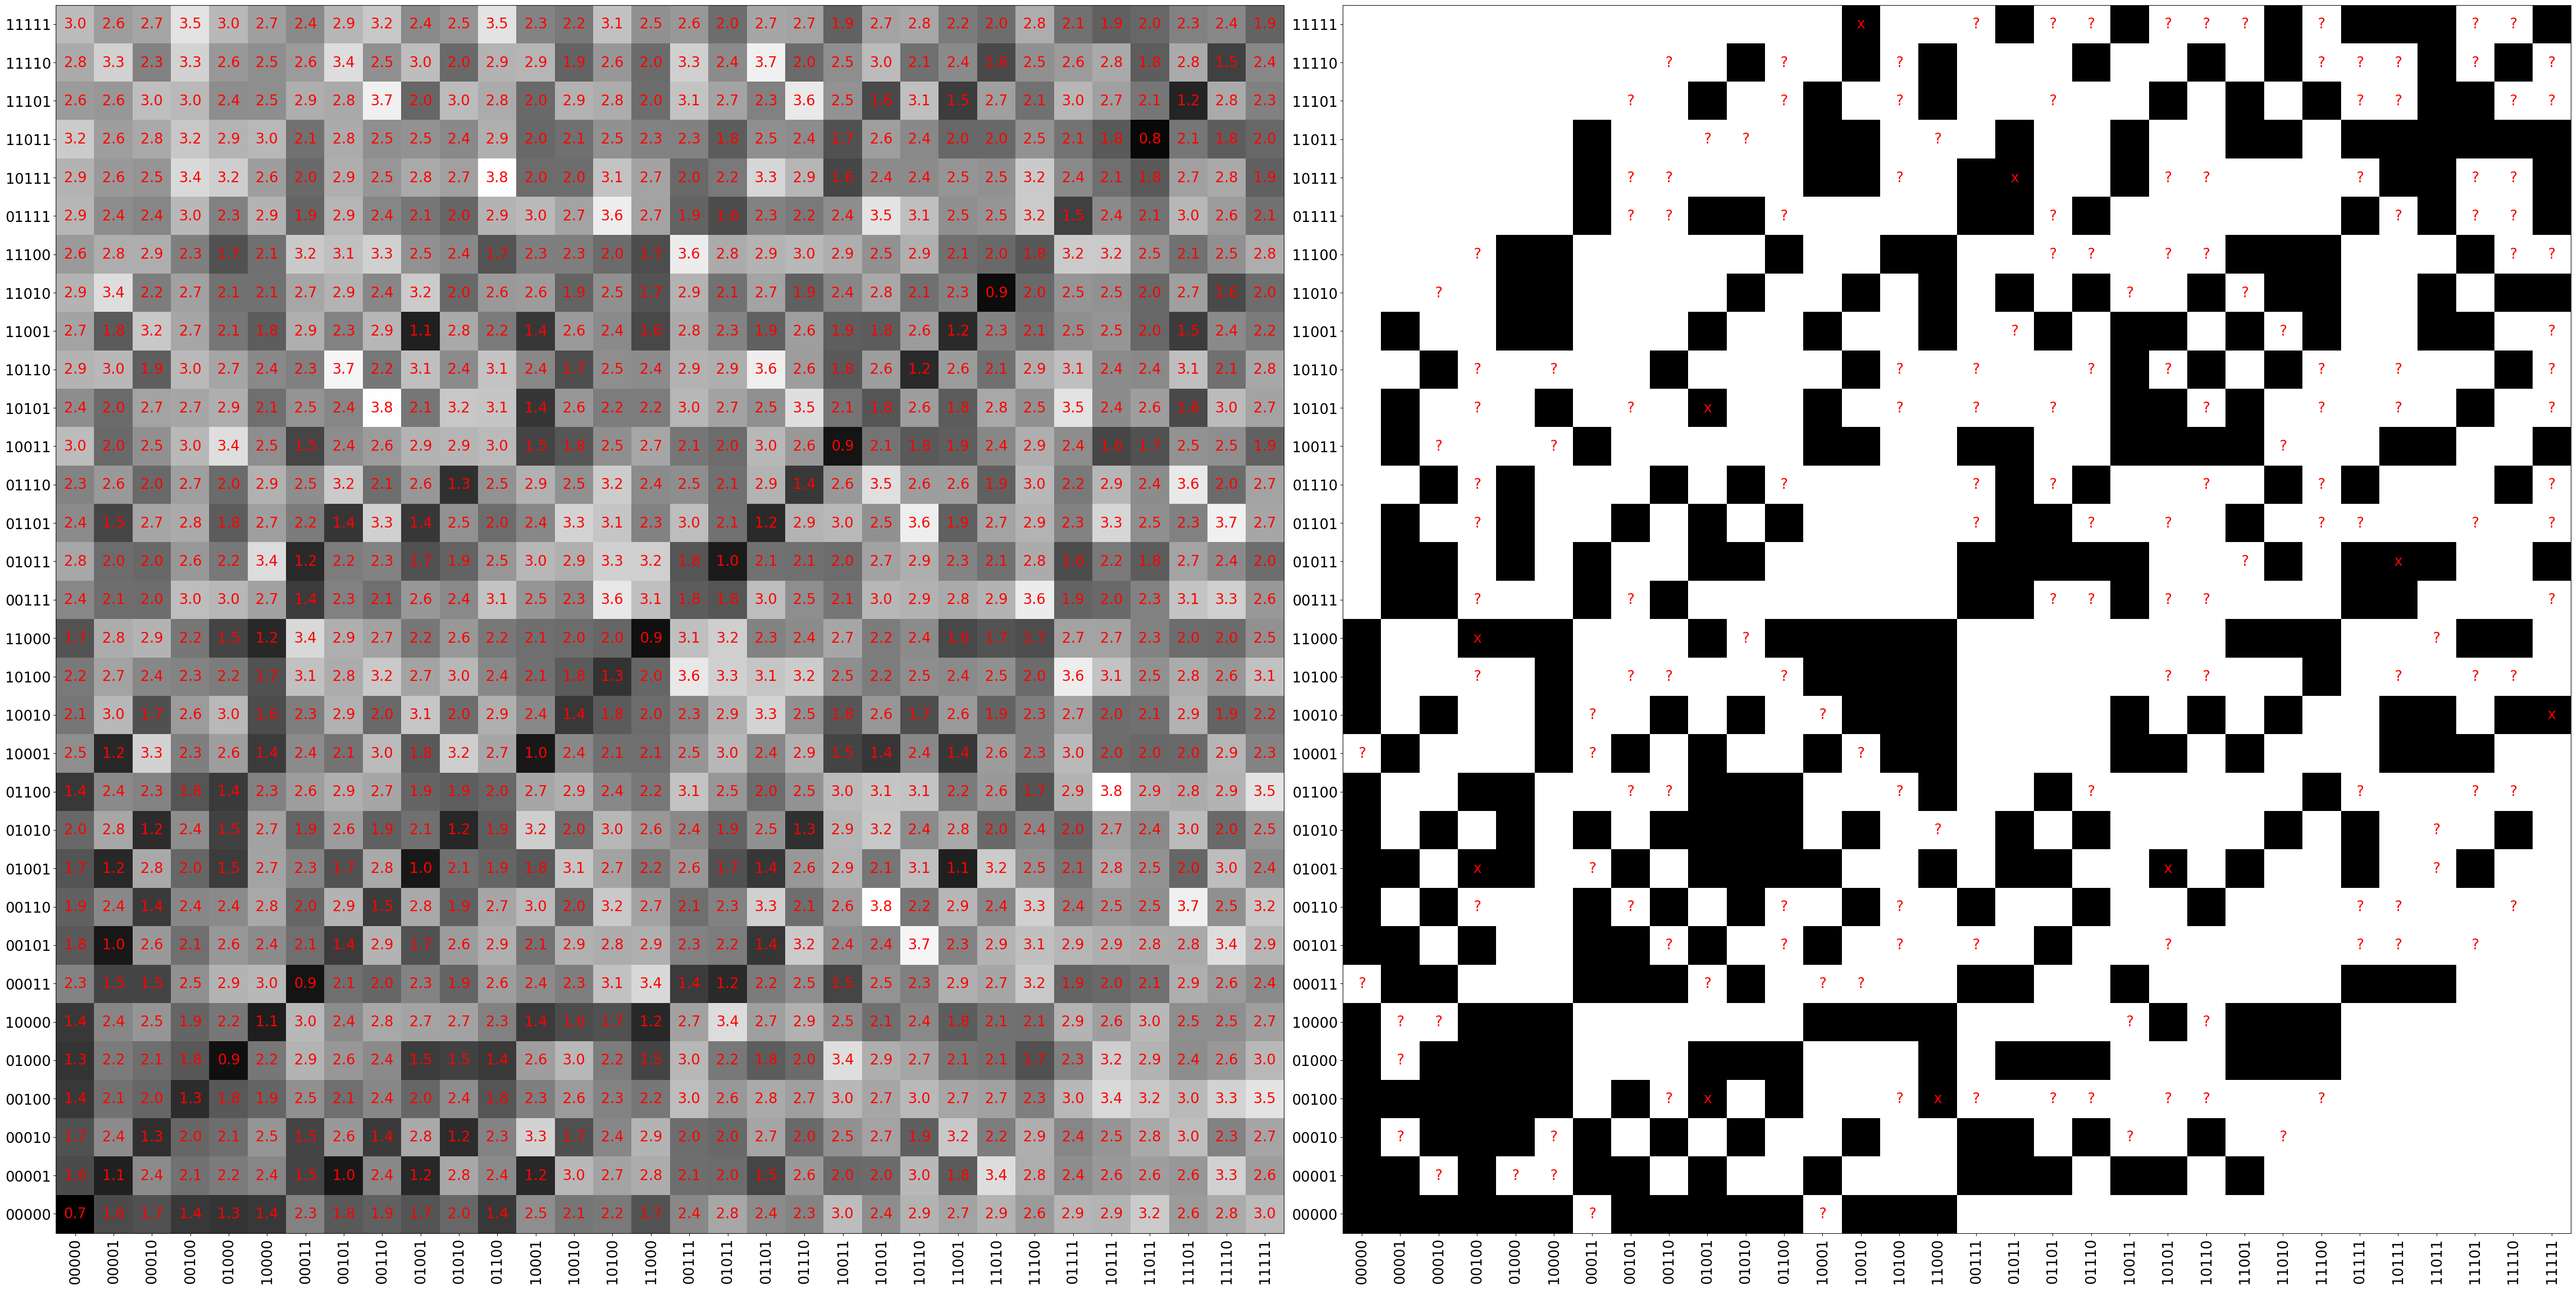

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(50, 25))

xlabels, ylabels = stringify_state(x), stringify_state(y)

heatmap(axes[0], hdist, xlabels, ylabels, annotation=hdist.round(1))
heatmap(axes[1], ~neighbors, xlabels, ylabels, annotation=errors)
fig.tight_layout()

#### Figure of tomography result for paper

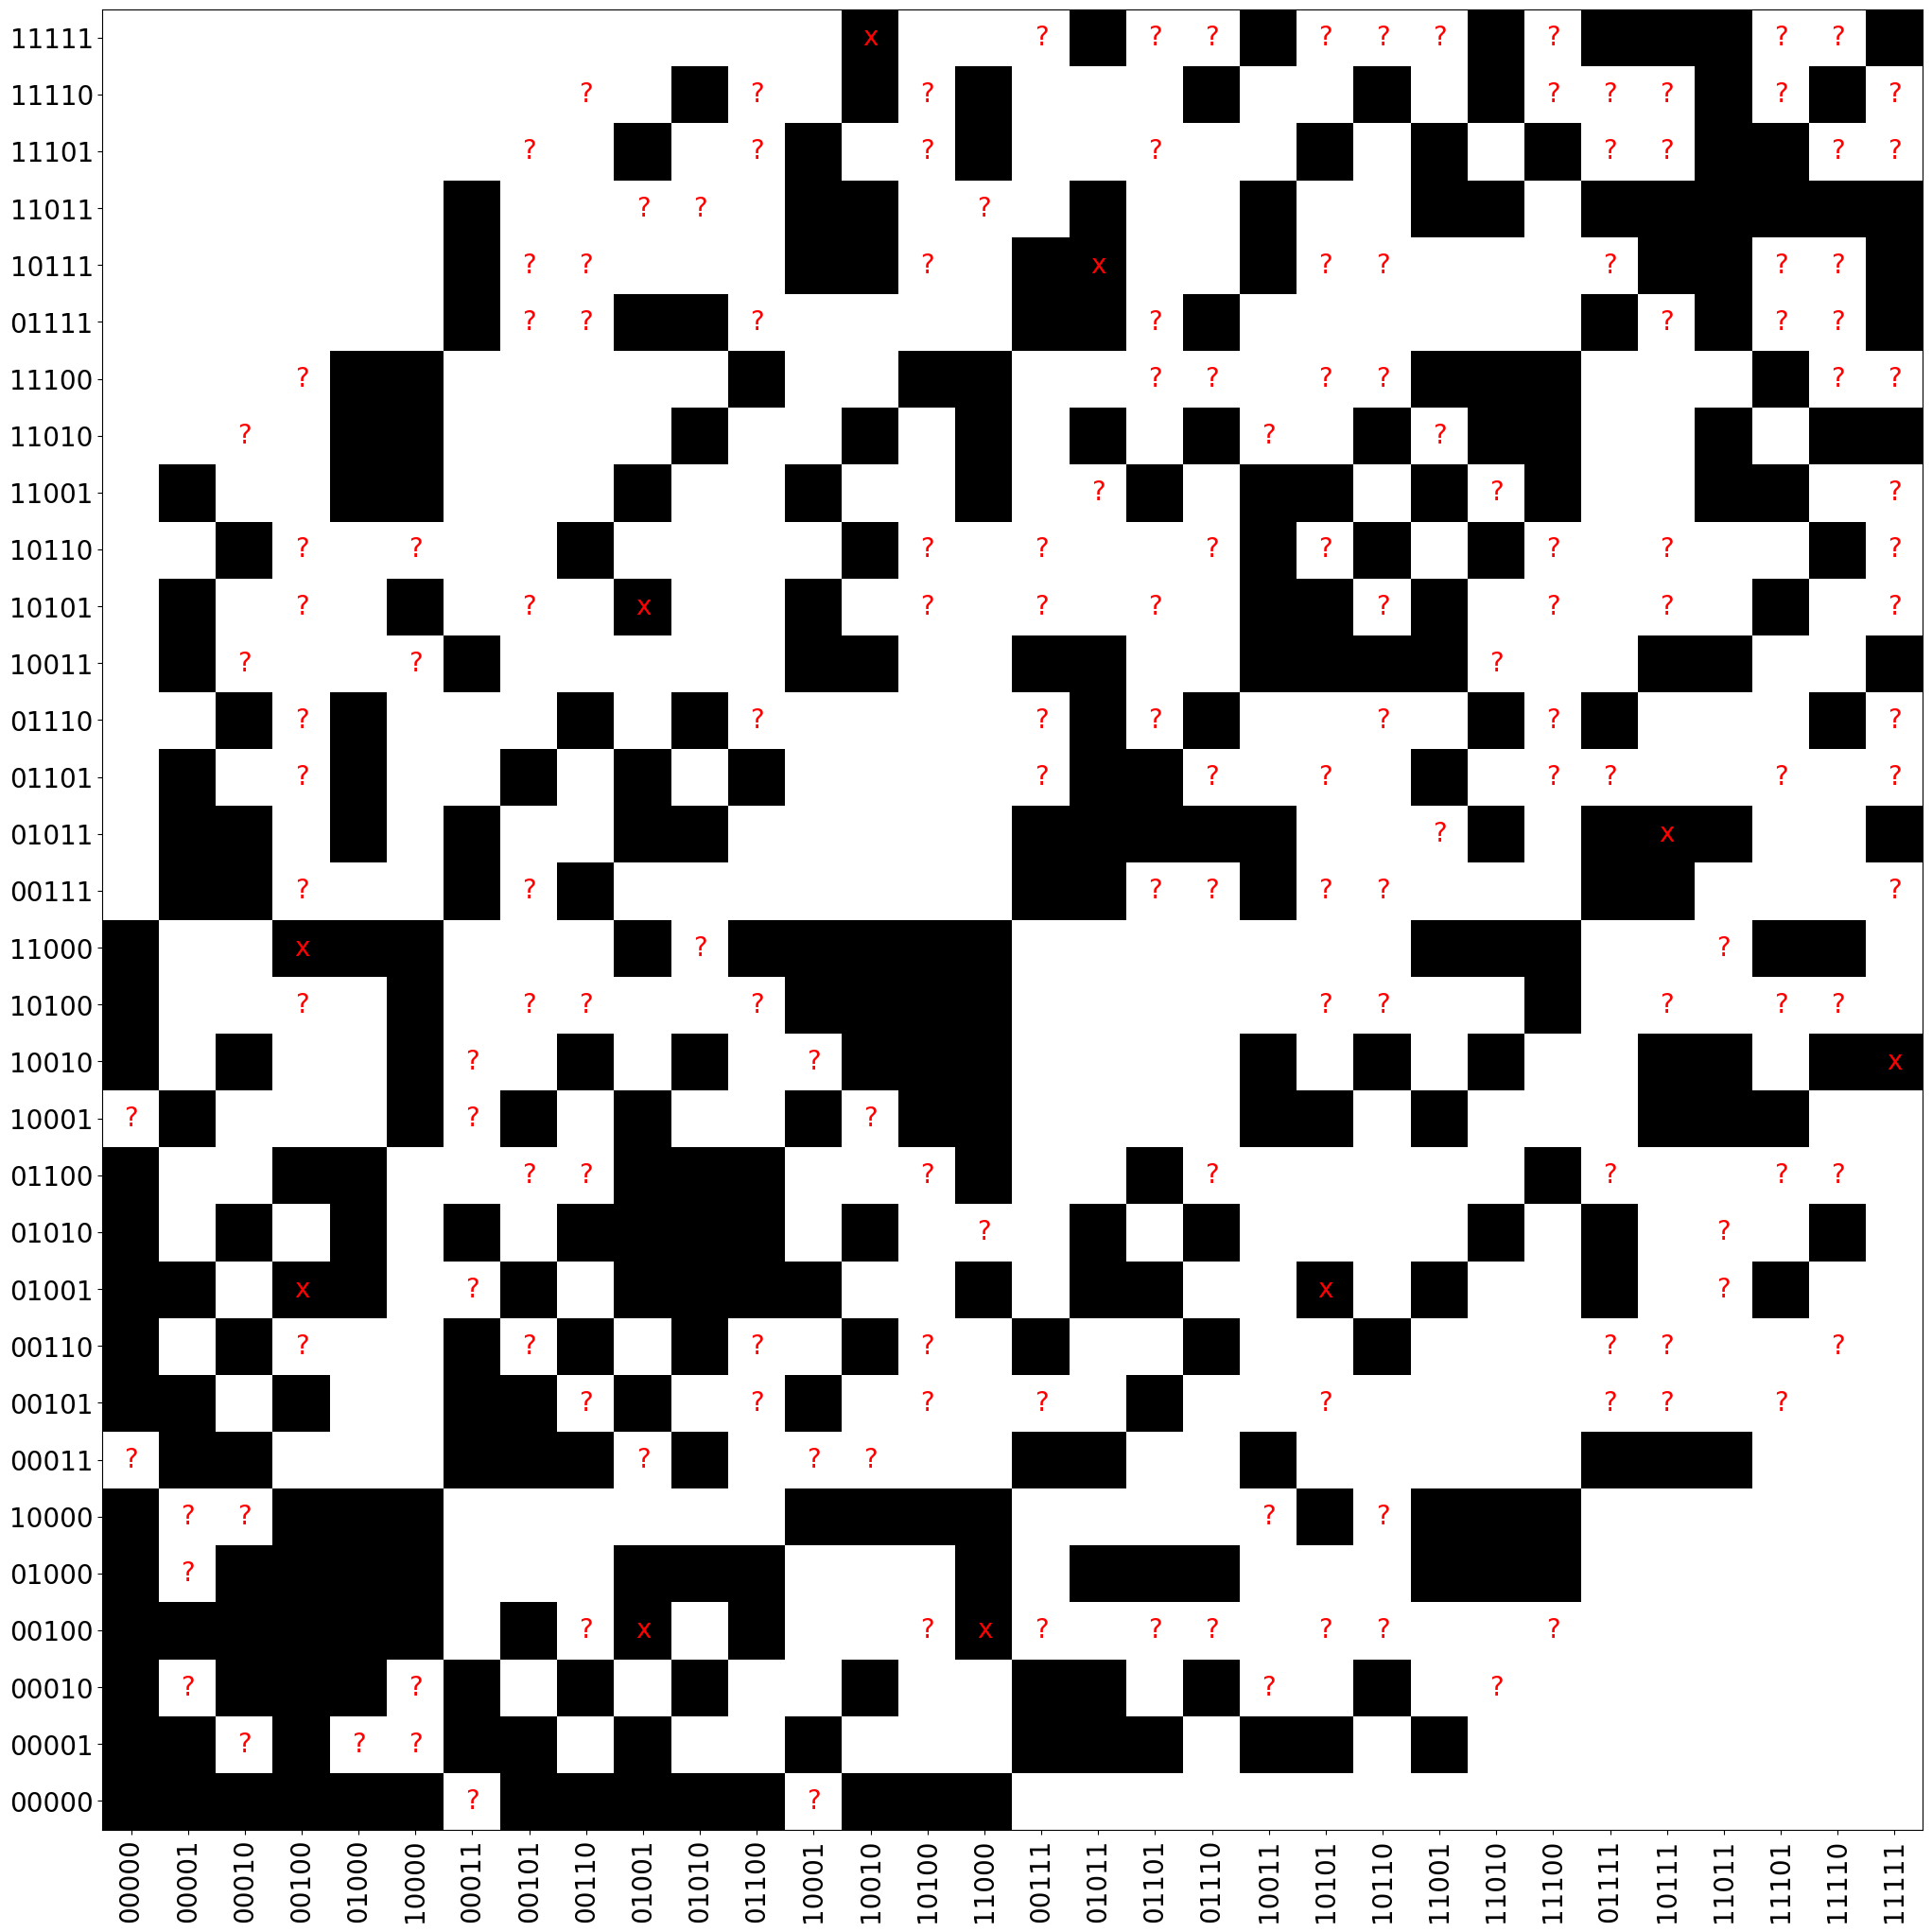

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(25, 25))

xlabels, ylabels = stringify_state(x), stringify_state(y)
heatmap(ax, ~neighbors, xlabels, ylabels, annotation=errors)
fig.savefig(f"hd_tomography_n{min_qubits_for_data_encoding(x)}.png", bbox_inches="tight")